In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.express as px

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
# Importing of csv files
hdb_prices_1990_1999 = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999 (Miko Poh).csv")
hdb_prices_2000_2012 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012 (Miko Poh).csv")
hdb_prices_2012_2014 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014 (Miko Poh).csv")
hdb_prices_2015_2016 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016 (Miko Poh).csv")
hdb_prices_2017_onwards = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards (Miko Poh).csv")

# **1   Cleaning up data**

In [4]:
# Checking number of rows and columns for each file
list_of_hdb_resale_files = [hdb_prices_1990_1999, hdb_prices_2000_2012, hdb_prices_2012_2014, hdb_prices_2015_2016, hdb_prices_2017_onwards]
for file in list_of_hdb_resale_files: 
    print(file.loc[0,"month"], file.shape)

1990-01 (287196, 10)
2000-01 (369651, 10)
2012-03 (52203, 10)
2015-01 (37153, 11)
2017-01 (134168, 11)


In [5]:
# Combining all data into one dataframe
hdb_resale_price_df = pd.concat(list_of_hdb_resale_files)

print(hdb_resale_price_df.describe())
hdb_resale_price_df

       floor_area_sqm  lease_commence_date  resale_price
count   880371.000000        880371.000000  8.803710e+05
mean        95.706384          1987.759291  3.072343e+05
std         25.932160            10.119563  1.591480e+05
min         28.000000          1966.000000  5.000000e+03
25%         73.000000          1980.000000  1.880000e+05
50%         93.000000          1986.000000  2.855000e+05
75%        113.000000          1995.000000  4.000000e+05
max        307.000000          2019.000000  1.418000e+06


month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
134163  2022-08      YISHUN     5 ROOM   850      YISHUN ST 81     01 TO 03   
134164  2022-08      YISHUN  EXECUTIVE   325       YISHUN CTRL     07 TO 09   
134165  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
134166  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
134167  2022-08      YISHUN  EXECUTIVE   643      YISHUN ST 61     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        IMPROVED                 1977        9000.0   
1                 31.0        IMPROVED                 1977        6000.0   
2                 31.0        IMPROVED                 1977        8000.0   
3                 31.0        IMPROVED                 1977        6000.0   
4                 73.0  NEW GENERATION                 1976       47200.0   
...                ...             ...                  ...           ...   
134163           122.0        Improved                 1988      570000.0   
134164           146.0      Maisonette                 1988      768888.0   
134165           150.0      Maisonette                 1988      778000.0   
134166           146.0      Maisonette                 1988      838000.0   
134167           146.0      Maisonette                 1987      748000.0   

           remaining_lease  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
134163            65 years  
134164  65 years 04 months  
134165  65 years 04 months  
134166  65 years 04 months  
134167  64 years 02 months  

[880371 rows x 11 columns]

## 1.1  Changing dates into year format and checking for any na(s)

In [6]:
# Changing column name "month" to "date" and extracting year of sale from "date" column into new column "year"
hdb_resale_price_df.rename(columns={"month":"date"}, inplace=True)
hdb_resale_price_df["year"] = pd.to_datetime(hdb_resale_price_df["date"]).dt.year
hdb_resale_price_df.head(5)

# Create new column price per sqm by dividing resale price by area
hdb_resale_price_df["price_per_sqm"] = hdb_resale_price_df["resale_price"] / hdb_resale_price_df["floor_area_sqm"]

In [7]:
# Checking for na in all of the column and sum them
pd.isna(hdb_resale_price_df).sum()

date                        0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
price_per_sqm               0
dtype: int64

In [8]:
# Recalculating "remaning_lease" column by year of minus lease commence date from year of sale based on 99-year lease
local_maximum_lease_years = 99
hdb_resale_price_df["remaining_lease"] = local_maximum_lease_years - (hdb_resale_price_df["year"] - hdb_resale_price_df["lease_commence_date"])

# To check again that there is no na values
pd.isna(hdb_resale_price_df).sum() 

date                   0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
price_per_sqm          0
dtype: int64

## 1.2  Changing categories word format into same formatting

In [9]:
# All unique values in "flat model" column
print(hdb_resale_price_df["flat_model"].unique())

# Showing information for all columns
hdb_resale_price_df.describe(include="all")

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT' 'Improved'
 'New Generation' 'Model A' 'Standard' 'Apartment' 'Simplified'
 'Model A-Maisonette' 'Maisonette' 'Multi Generation' 'Adjoined flat'
 'Premium Apartment' 'Terrace' 'Improved-Maisonette' 'Premium Maisonette'
 '2-room' 'Model A2' 'DBSS' 'Type S1' 'Type S2' 'Premium Apartment Loft'
 '3Gen']


date      town flat_type   block     street_name storey_range  \
count    880371    880371    880371  880371          880371       880371   
unique      392        27         8    2615             579           25   
top     1999-03  TAMPINES    4 ROOM       2  YISHUN RING RD     04 TO 06   
freq       6465     76884    332006    4473           16877       221887   
mean        NaN       NaN       NaN     NaN             NaN          NaN   
std         NaN       NaN       NaN     NaN             NaN          NaN   
min         NaN       NaN       NaN     NaN             NaN          NaN   
25%         NaN       NaN       NaN     NaN             NaN          NaN   
50%         NaN       NaN       NaN     NaN             NaN          NaN   
75%         NaN       NaN       NaN     NaN             NaN          NaN   
max         NaN       NaN       NaN     NaN             NaN          NaN   

        floor_area_sqm flat_model  lease_commence_date  resale_price  \
count    880371.000000     880371        880371.000000  8.803710e+05   
unique             NaN         34                  NaN           NaN   
top                NaN    Model A                  NaN           NaN   
freq               NaN     176162                  NaN           NaN   
mean         95.706384        NaN          1987.759291  3.072343e+05   
std          25.932160        NaN            10.119563  1.591480e+05   
min          28.000000        NaN          1966.000000  5.000000e+03   
25%          73.000000        NaN          1980.000000  1.880000e+05   
50%          93.000000        NaN          1986.000000  2.855000e+05   
75%         113.000000        NaN          1995.000000  4.000000e+05   
max         307.000000        NaN          2019.000000  1.418000e+06   

        remaining_lease           year  price_per_sqm  
count     880371.000000  880371.000000  880371.000000  
unique              NaN            NaN            NaN  
top                 NaN            NaN            NaN  
freq                NaN            NaN            NaN  
mean          81.488229    2005.271062    3169.859301  
std           10.294420       8.689547    1392.143195  
min           44.000000    1990.000000     161.290323  
25%           75.000000    1998.000000    2261.904762  
50%           83.000000    2004.000000    2866.666667  
75%           90.000000    2012.000000    3988.095238  
max          101.000000    2022.000000   13310.344828

In [10]:
# Replacing "MULTI GENERATION" with "MULTI-GENERATION" to keep flat_type as 7 categories
hdb_resale_price_df["flat_type"].replace("MULTI GENERATION", "MULTI-GENERATION",inplace=True)

# Standardise flat model strings to lower and only captilize first word
temp_flat_model_list = [] # Temporary empty list to be appended

for model in hdb_resale_price_df["flat_model"]:
    temp_flat_model = model.lower().title()
    temp_flat_model_list.append(temp_flat_model)

# Showing all unique flat model elements and ensure all are unique
hdb_resale_price_df["flat_model"] = temp_flat_model_list
print(hdb_resale_price_df["flat_model"].unique())

hdb_resale_price_df.describe(include="all") # To ensure flat_types is 7

['Improved' 'New Generation' 'Model A' 'Standard' 'Simplified'
 'Model A-Maisonette' 'Apartment' 'Maisonette' 'Terrace' '2-Room'
 'Improved-Maisonette' 'Multi Generation' 'Premium Apartment'
 'Adjoined Flat' 'Premium Maisonette' 'Model A2' 'Dbss' 'Type S1'
 'Type S2' 'Premium Apartment Loft' '3Gen']


date      town flat_type   block     street_name storey_range  \
count    880371    880371    880371  880371          880371       880371   
unique      392        27         7    2615             579           25   
top     1999-03  TAMPINES    4 ROOM       2  YISHUN RING RD     04 TO 06   
freq       6465     76884    332006    4473           16877       221887   
mean        NaN       NaN       NaN     NaN             NaN          NaN   
std         NaN       NaN       NaN     NaN             NaN          NaN   
min         NaN       NaN       NaN     NaN             NaN          NaN   
25%         NaN       NaN       NaN     NaN             NaN          NaN   
50%         NaN       NaN       NaN     NaN             NaN          NaN   
75%         NaN       NaN       NaN     NaN             NaN          NaN   
max         NaN       NaN       NaN     NaN             NaN          NaN   

        floor_area_sqm flat_model  lease_commence_date  resale_price  \
count    880371.000000     880371        880371.000000  8.803710e+05   
unique             NaN         21                  NaN           NaN   
top                NaN    Model A                  NaN           NaN   
freq               NaN     246543                  NaN           NaN   
mean         95.706384        NaN          1987.759291  3.072343e+05   
std          25.932160        NaN            10.119563  1.591480e+05   
min          28.000000        NaN          1966.000000  5.000000e+03   
25%          73.000000        NaN          1980.000000  1.880000e+05   
50%          93.000000        NaN          1986.000000  2.855000e+05   
75%         113.000000        NaN          1995.000000  4.000000e+05   
max         307.000000        NaN          2019.000000  1.418000e+06   

        remaining_lease           year  price_per_sqm  
count     880371.000000  880371.000000  880371.000000  
unique              NaN            NaN            NaN  
top                 NaN            NaN            NaN  
freq                NaN            NaN            NaN  
mean          81.488229    2005.271062    3169.859301  
std           10.294420       8.689547    1392.143195  
min           44.000000    1990.000000     161.290323  
25%           75.000000    1998.000000    2261.904762  
50%           83.000000    2004.000000    2866.666667  
75%           90.000000    2012.000000    3988.095238  
max          101.000000    2022.000000   13310.344828

## 1.3  Removal of overlapping storey ranges

In [11]:
# List of unique storey range and sort
list_of_storey_range = np.sort(hdb_resale_price_df["storey_range"].unique())
list_of_storey_range

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype=object)

In [12]:
# Dropping overlapped storey range
storey_range_to_drop = ['01 TO 05','06 TO 10','11 TO 15','16 TO 20','21 TO 25','26 TO 30','31 TO 35','36 TO 40']
hdb_resale_price_df = hdb_resale_price_df.loc[~(hdb_resale_price_df["storey_range"].isin (storey_range_to_drop))]

## 1.4  Removal of duplicates

In [13]:
#Removing duplicates from data and resetting the index numbers
hdb_resale_price_df.drop_duplicates(inplace=True)
hdb_resale_price_df.reset_index(drop=True, inplace=True)
hdb_resale_price_df

C:\Users\User\AppData\Local\Temp\ipykernel_19896\1453569528.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
871601  2022-08      YISHUN     5 ROOM   850      YISHUN ST 81     01 TO 03   
871602  2022-08      YISHUN  EXECUTIVE   325       YISHUN CTRL     07 TO 09   
871603  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
871604  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
871605  2022-08      YISHUN  EXECUTIVE   643      YISHUN ST 61     10 TO 12   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0                 31.0        Improved                 1977        9000.0   
1                 31.0        Improved                 1977        6000.0   
2                 31.0        Improved                 1977        8000.0   
3                 31.0        Improved                 1977        6000.0   
4                 73.0  New Generation                 1976       47200.0   
...                ...             ...                  ...           ...   
871601           122.0        Improved                 1988      570000.0   
871602           146.0      Maisonette                 1988      768888.0   
871603           150.0      Maisonette                 1988      778000.0   
871604           146.0      Maisonette                 1988      838000.0   
871605           146.0      Maisonette                 1987      748000.0   

        remaining_lease  year  price_per_sqm  
0                    86  1990     290.322581  
1                    86  1990     193.548387  
2                    86  1990     258.064516  
3                    86  1990     193.548387  
4                    85  1990     646.575342  
...                 ...   ...            ...  
871601               65  2022    4672.131148  
871602               65  2022    5266.356164  
871603               65  2022    5186.666667  
871604               65  2022    5739.726027  
871605               64  2022    5123.287671  

[871606 rows x 13 columns]

# **2   Start of analysis after cleaning up data**

## 2.1  Calculating average HDB price and average price per square meter from 1990 to 2022

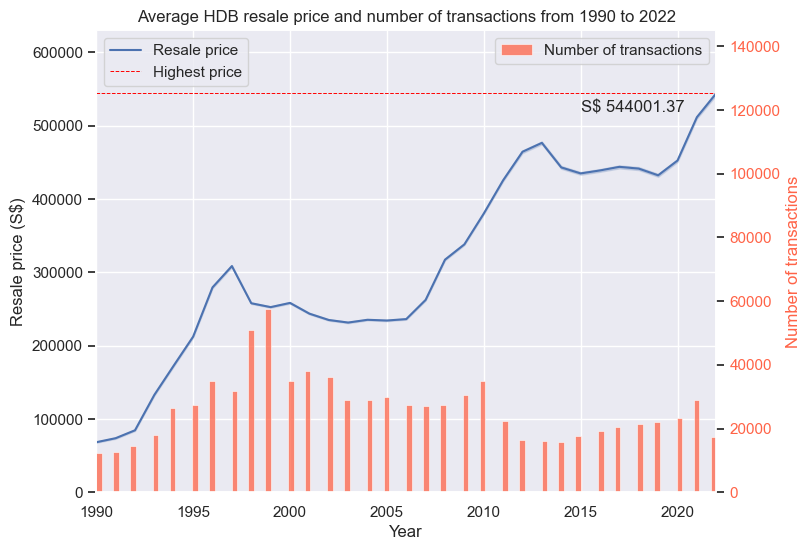

In [14]:
# Average price of HDB per year
avg_hdb_price_per_year = hdb_resale_price_df.groupby(["year"])['resale_price'].mean()

# Plotting average price of HDB per year as a line chart
fig, avg_price_per_year_ax = plt.subplots(figsize=(8,6))
sns.lineplot(data = hdb_resale_price_df, x ="year",y ="resale_price", ax = avg_price_per_year_ax, label="Resale price")
avg_price_per_year_ax.set(title="Average HDB resale price and number of transactions from 1990 to 2022", 
                          xlabel = "Year", 
                          ylabel = "Resale price (S$)")
avg_price_per_year_ax.set_xlim([1990,2022])
avg_price_per_year_ax.set_ylim([0,630000])
avg_price_per_year_ax.legend(loc=1)

# Annotating the highest average price
highest_mean_price = avg_hdb_price_per_year.max()
text = f"S$ {round(highest_mean_price,2)}"
avg_price_per_year_ax.annotate(text, xy = (2015,518000))
avg_price_per_year_ax.axhline(y=highest_mean_price, label="Highest price", color="red", linestyle="--", linewidth= 0.7)
avg_price_per_year_ax.legend(loc=2)

# Plotting barplot to show number of transactions
HDB_count_ax = avg_price_per_year_ax.twinx()
sns.histplot(data = hdb_resale_price_df, x ="year", ax = HDB_count_ax, color="tomato", label="Number of transactions")
HDB_count_ax.set_ylabel("Number of transactions", color="tomato")
HDB_count_ax.grid(False) # Remove gridlines for second chart
HDB_count_ax.set_ylim([0,145000])
for label in HDB_count_ax.get_yticklabels():# Set all label for this axes to different colors from the other axes
    label.set_color("tomato")
HDB_count_ax.legend(loc=0)




## 2.2  Finding out which flat_type is worth the money

(1990.0, 2022.0)

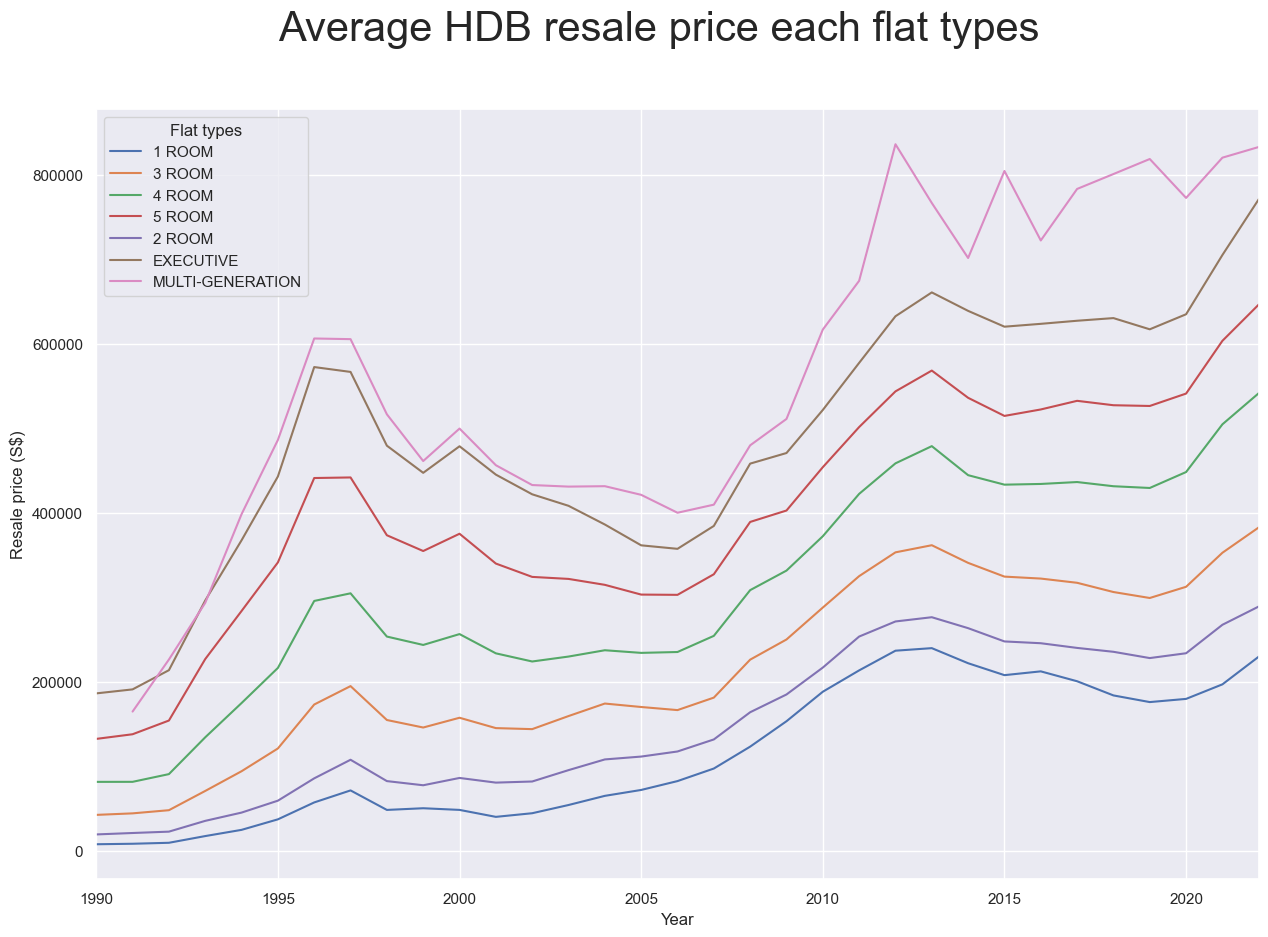

In [15]:
# Plotting resale price over the years for each flat type
fig, flat_type_resale_price_ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=hdb_resale_price_df, x = "year", y = "resale_price", hue = "flat_type", ci = None, ax = flat_type_resale_price_ax)
flat_type_resale_price_ax.set(xlabel = "Year", ylabel = "Resale price (S$)")
fig.suptitle('Average HDB resale price each flat types', fontsize=30)
flat_type_resale_price_ax.legend(title="Flat types")
flat_type_resale_price_ax.set_xlim([1990, 2022])

(1990.0, 2022.0)

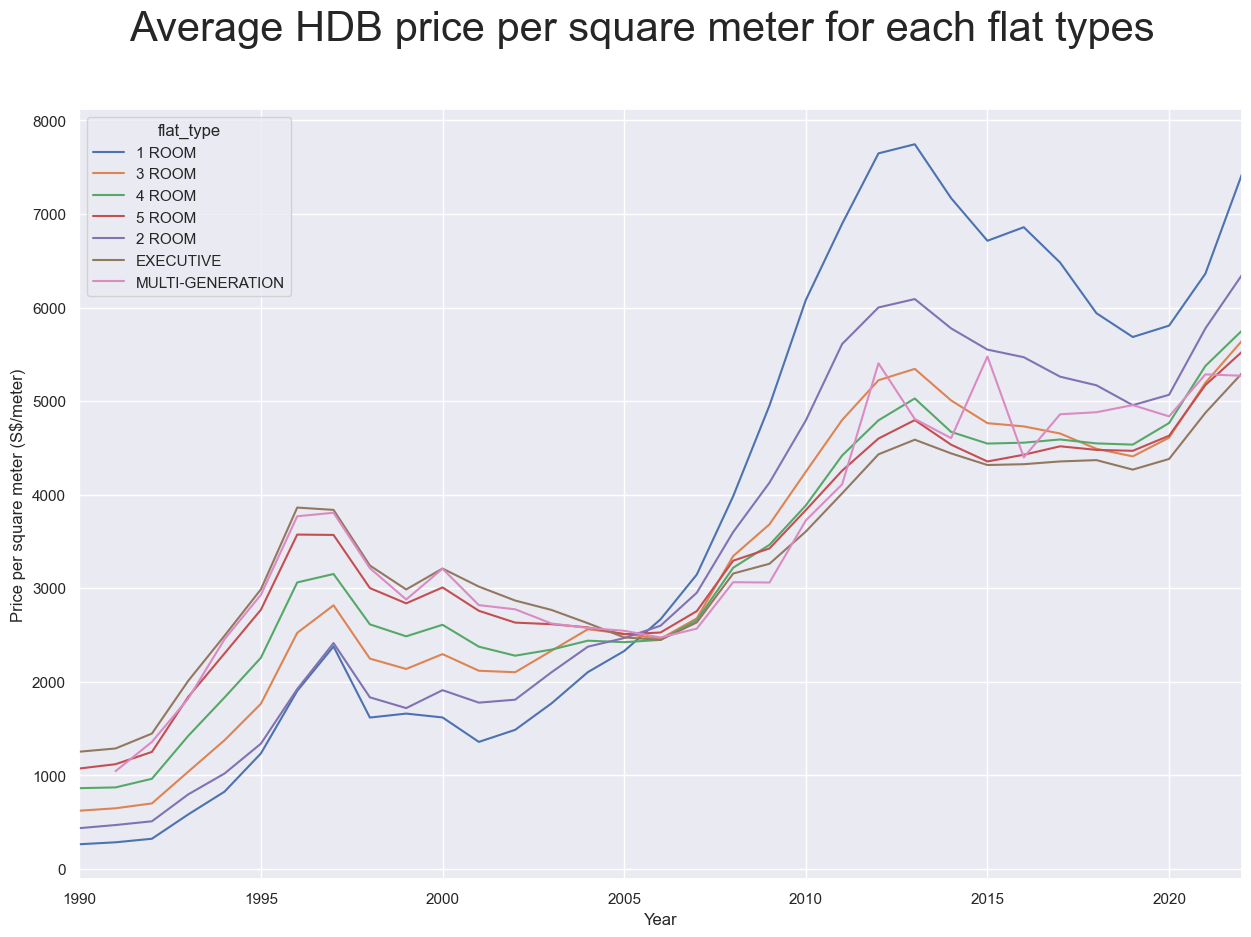

In [16]:
# Plotting average price per sqm over the years for each flat type
fig, flat_type_price_per_sqm_ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=hdb_resale_price_df, x = "year", y = "price_per_sqm", hue = "flat_type", ci = None, ax = flat_type_price_per_sqm_ax)
flat_type_price_per_sqm_ax.set(xlabel = "Year", ylabel = "Price per square meter (S$/meter)")
fig.suptitle('Average HDB price per square meter for each flat types', fontsize=30)
flat_type_resale_price_ax.legend(title="Flat types")
flat_type_price_per_sqm_ax.set_xlim([1990, 2022])

                     count         mean          std         min          25%  \
flat_type                                                                       
1 ROOM              1261.0  2137.838362  1899.955279  161.290323  1068.965517   
2 ROOM             10504.0  3048.465134  1907.235871  240.000000  1586.956522   
3 ROOM            281685.0  2829.817559  1435.937563  230.555556  1985.074627   
4 ROOM            328707.0  3235.919530  1405.342679  369.318182  2307.692308   
5 ROOM            182760.0  3448.864128  1260.611418  476.190476  2609.090909   
EXECUTIVE          66164.0  3397.238047   970.137836  753.424658  2727.272727   
MULTI-GENERATION     525.0  3216.997652  1105.767941  787.709497  2530.120482   

                          50%          75%           max  
flat_type                                                 
1 ROOM            1551.724138  2225.806452   8387.096774  
2 ROOM            2395.833333  4888.888889  10170.212766  
3 ROOM            2457.627119  377

[Text(0.5, 1.0, 'Price per square meter for each flat types'),
 Text(0.5, 0, 'Flat types'),
 Text(0, 0.5, 'Price per square meter (S$/meter)')]

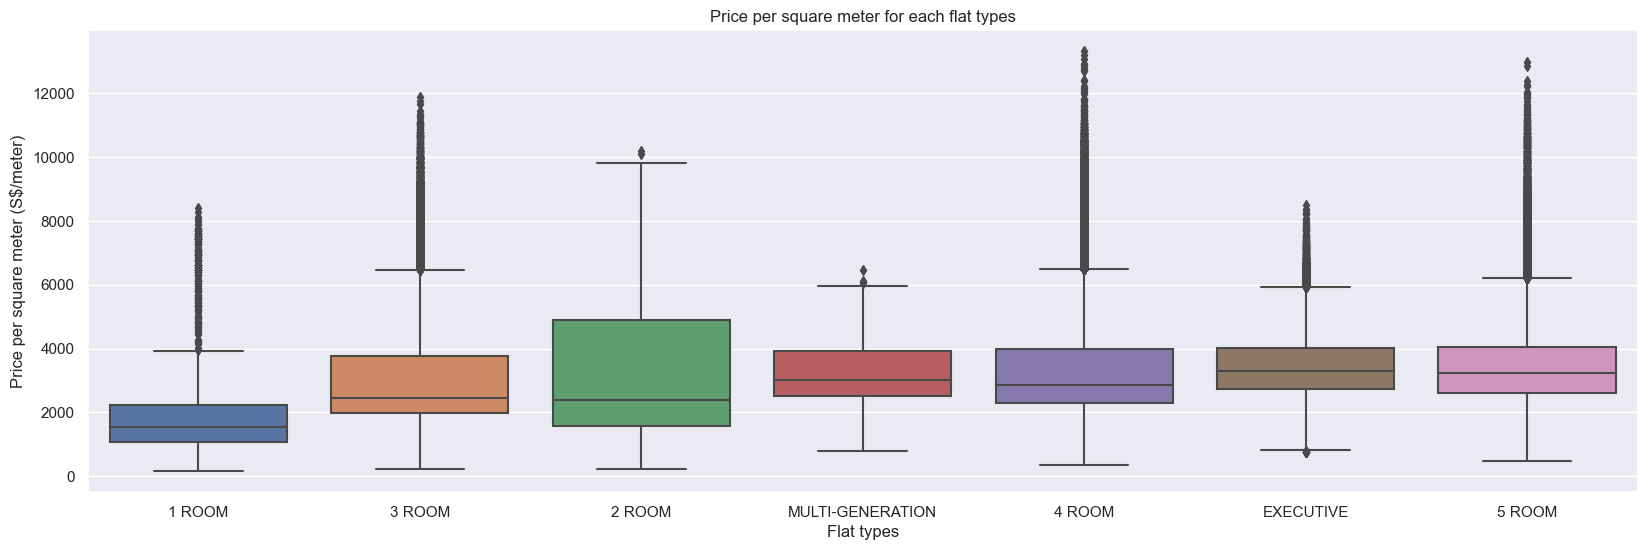

In [17]:
# Boxplot of floor square area per flat type
print((hdb_resale_price_df.groupby(["flat_type"])["price_per_sqm"]).describe())

# Sorting flat model according to average price per sqm and storing the order to use in plotting
flat_type_order = hdb_resale_price_df.groupby(["flat_type"])["price_per_sqm"].mean()
flat_type_order.sort_values(inplace=True)
order_for_boxplot = flat_type_order.index

# Plotting price per square meter for each flat type
fig_type, flat_type_price_per_sqm_ax = plt.subplots(figsize=(20,6))
sns.boxplot(data = hdb_resale_price_df, x = "flat_type", y = "price_per_sqm", order=order_for_boxplot, ax = flat_type_price_per_sqm_ax)
flat_type_price_per_sqm_ax.set(title="Price per square meter for each flat types", 
                               xlabel = "Flat types", 
                               ylabel = "Price per square meter (S$/meter)")

## 2.2.1  Due to lots of outliers there is a need to look into each flat type and its individual flat model

In [18]:
# Finding how many types of flat model for each flat type
number_of_flat_type = hdb_resale_price_df["flat_type"].unique()
flat_model_list = {} # Creating empty dictionary

for flat_type in number_of_flat_type:
    number_room = hdb_resale_price_df.loc[hdb_resale_price_df["flat_type"] == flat_type,:]
    flat_model_list[flat_type] = number_room["flat_model"].unique() # Adding flat type and flat model into dictionary

flat_model_list

{'1 ROOM': array(['Improved'], dtype=object),
 '3 ROOM': array(['New Generation', 'Improved', 'Model A', 'Standard', 'Terrace',
        'Simplified', 'Adjoined Flat', 'Premium Apartment', 'Dbss'],
       dtype=object),
 '4 ROOM': array(['New Generation', 'Improved', 'Model A', 'Simplified', 'Standard',
        'Terrace', 'Adjoined Flat', 'Premium Apartment', 'Model A2',
        'Dbss', 'Type S1', 'Premium Apartment Loft'], dtype=object),
 '5 ROOM': array(['Improved', 'Model A', 'Standard', 'Model A-Maisonette',
        'Improved-Maisonette', 'Premium Apartment', 'Adjoined Flat',
        'Dbss', 'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object),
 '2 ROOM': array(['Improved', 'Standard', '2-Room', 'Model A', 'Premium Apartment',
        'Dbss'], dtype=object),
 'EXECUTIVE': array(['Apartment', 'Maisonette', 'Premium Apartment', 'Adjoined Flat',
        'Premium Maisonette'], dtype=object),
 'MULTI-GENERATION': array(['Multi Generation'], dtype=object)}

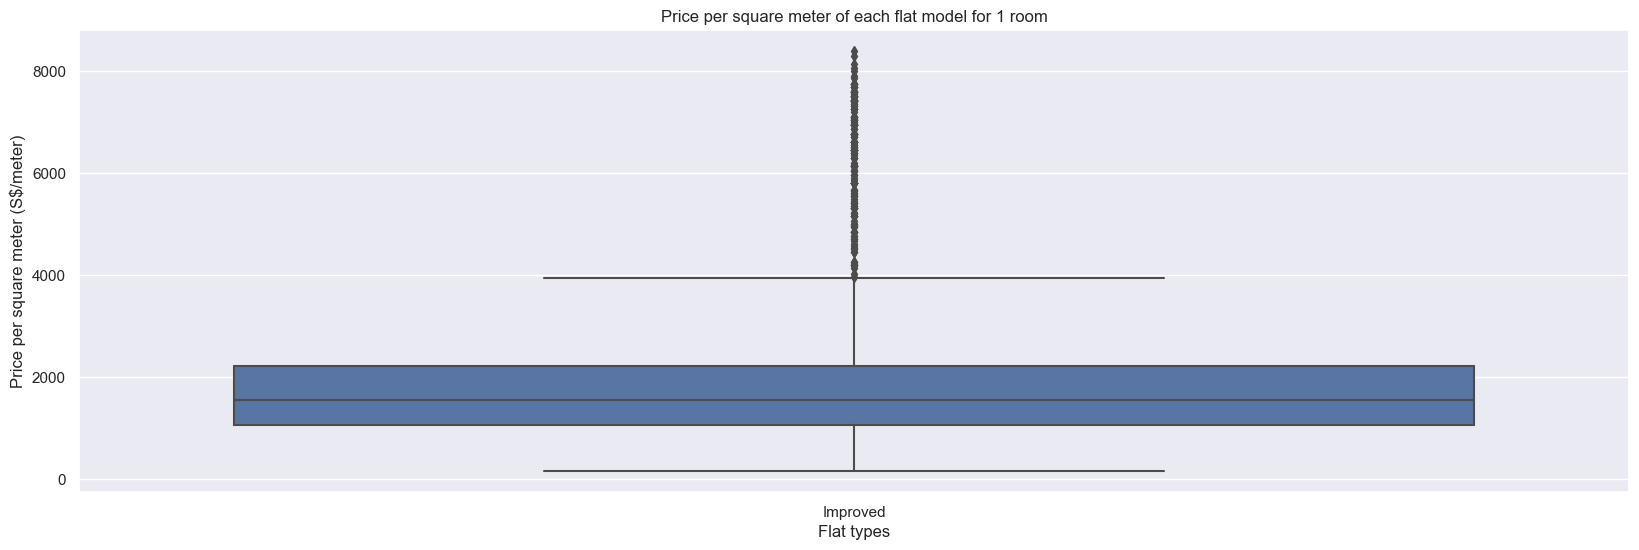

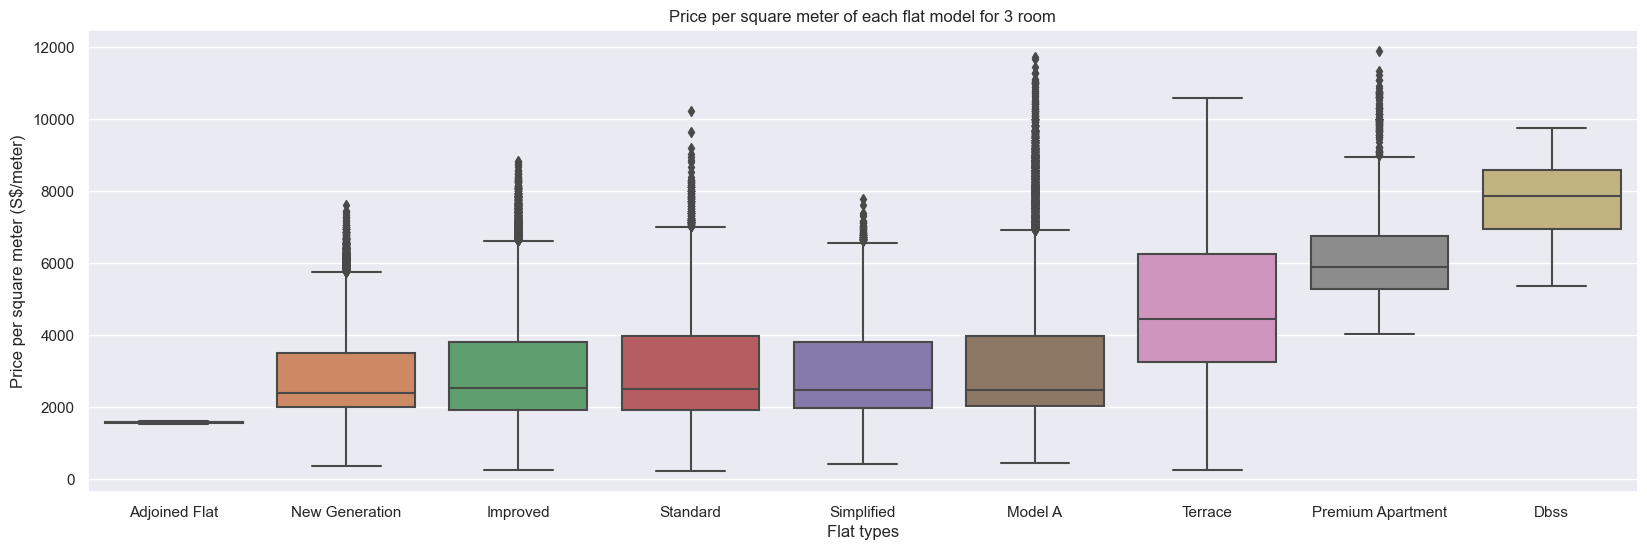

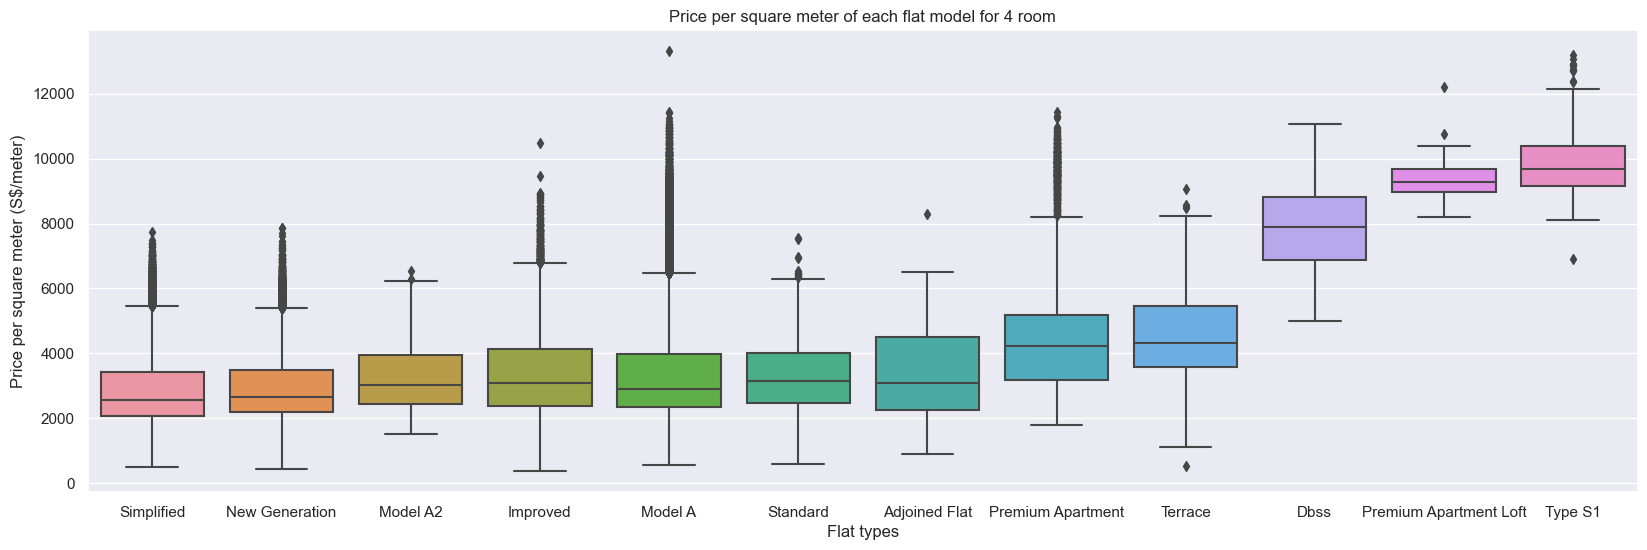

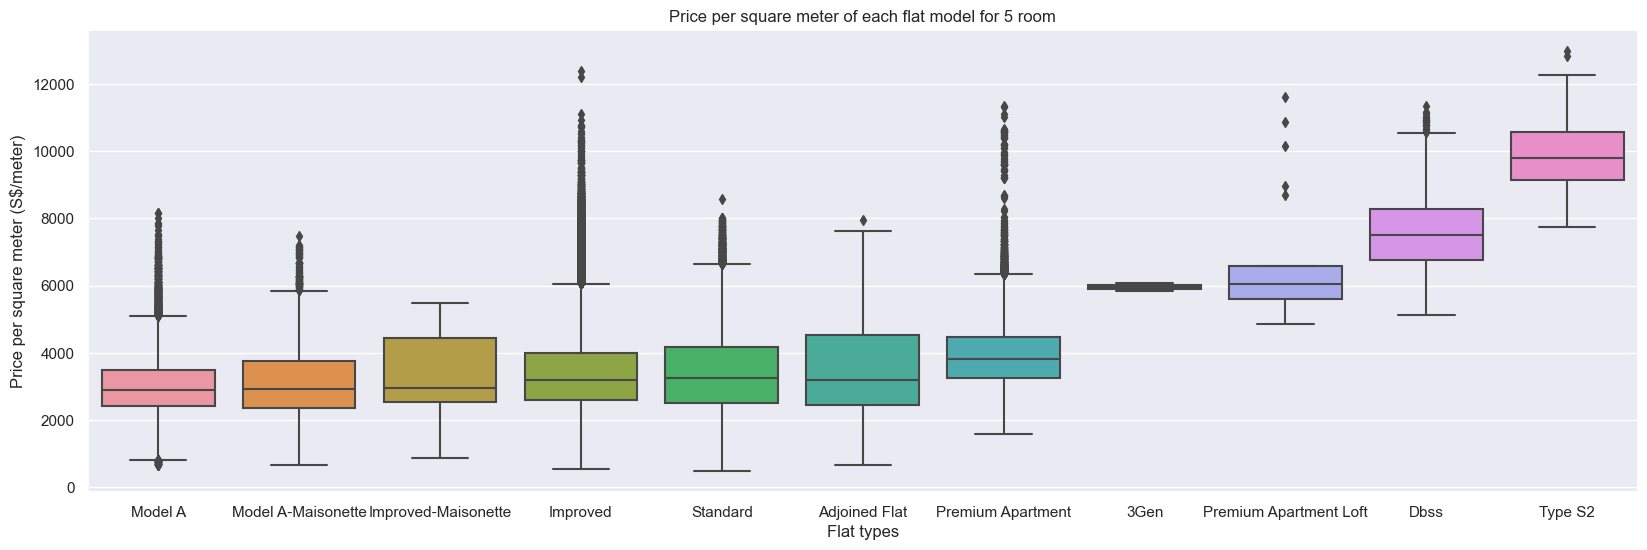

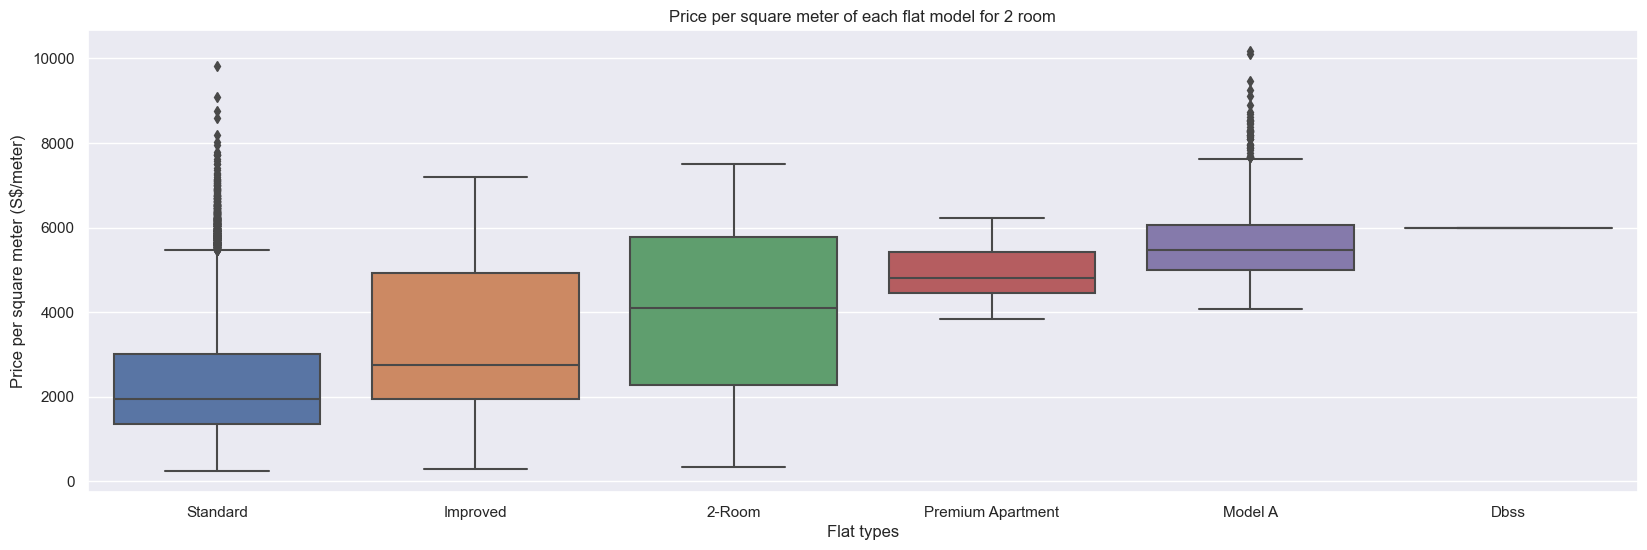

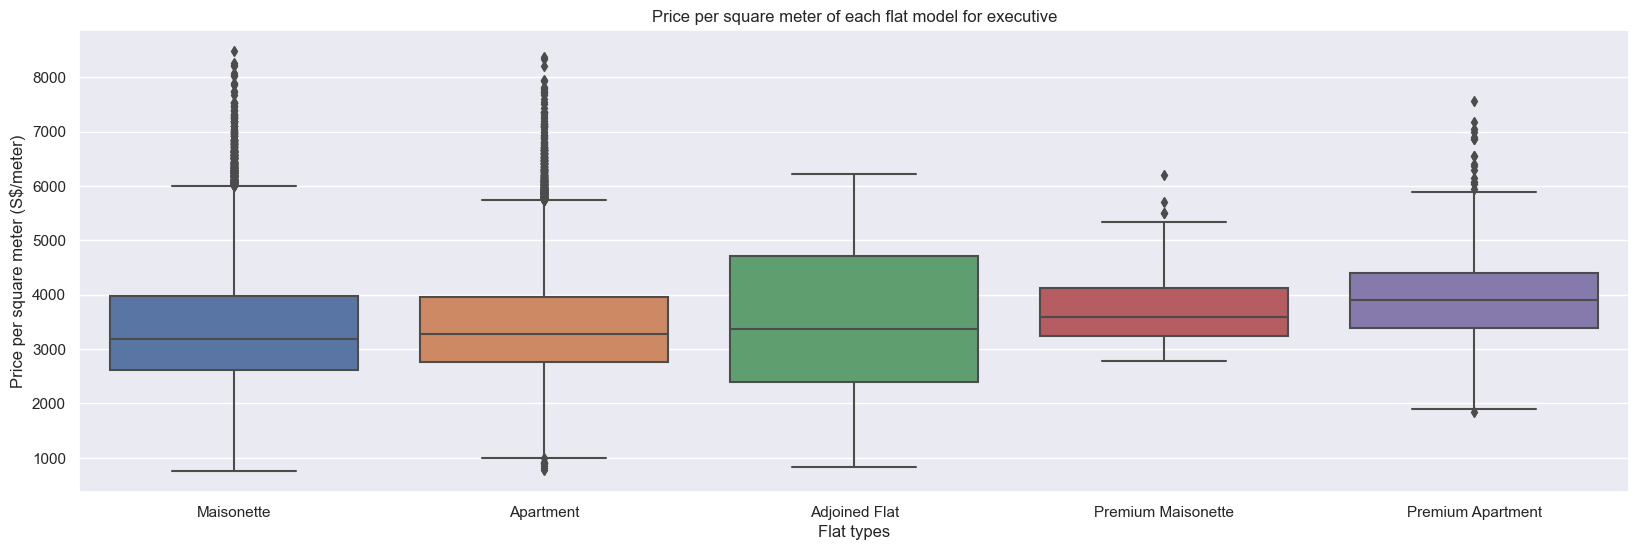

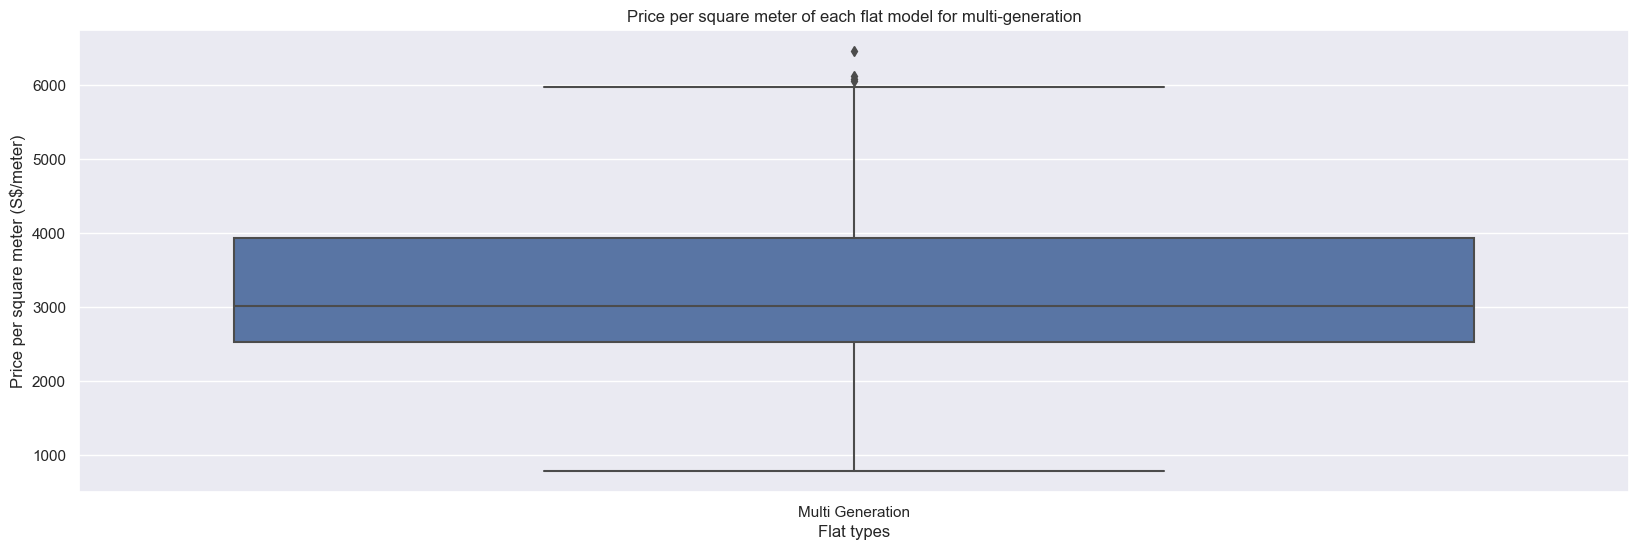

In [19]:
# Creating boxplot for each flat type with flat model
for flat_type in number_of_flat_type: 
    number_room_temp = hdb_resale_price_df.loc[hdb_resale_price_df["flat_type"] == flat_type, :] # Slicing specific room types

    # Sorting flat model according to average price per sqm and storing the order to use in plotting
    flat_model_order = number_room_temp.groupby(["flat_model"])["price_per_sqm"].mean()
    flat_model_order.sort_values(inplace=True)
    order_for_boxplot = flat_model_order.index

    # Plotting and charts
    fig_model, flat_model_price_per_sqm_ax = plt.subplots(figsize=(20,6))
    sns.boxplot(data = number_room_temp, x = "flat_model", y = "price_per_sqm", order=order_for_boxplot, ax = flat_model_price_per_sqm_ax)
    flat_model_price_per_sqm_ax.set(title=f"Price per square meter of each flat model for {flat_type.lower()}",
                                    xlabel = "Flat types", 
                                    ylabel = "Price per square meter (S$/meter)")

In [20]:
# Filtering out extreme flat models
flat_model_to_separate = ["Dbss", "Premium Apartment Loft", "Type S1", "Type S2", "Terrace"]

filtered_hdb_resale_price_df = hdb_resale_price_df.loc[~(hdb_resale_price_df["flat_model"].isin(flat_model_to_separate))]

## 2.2.2  Outliers extracted to be analyse separately

[Text(0.5, 1.0, 'Price per square meter of each flat type'),
 Text(0.5, 0, 'Flat types'),
 Text(0, 0.5, 'Price per square meter (S$/meter)')]

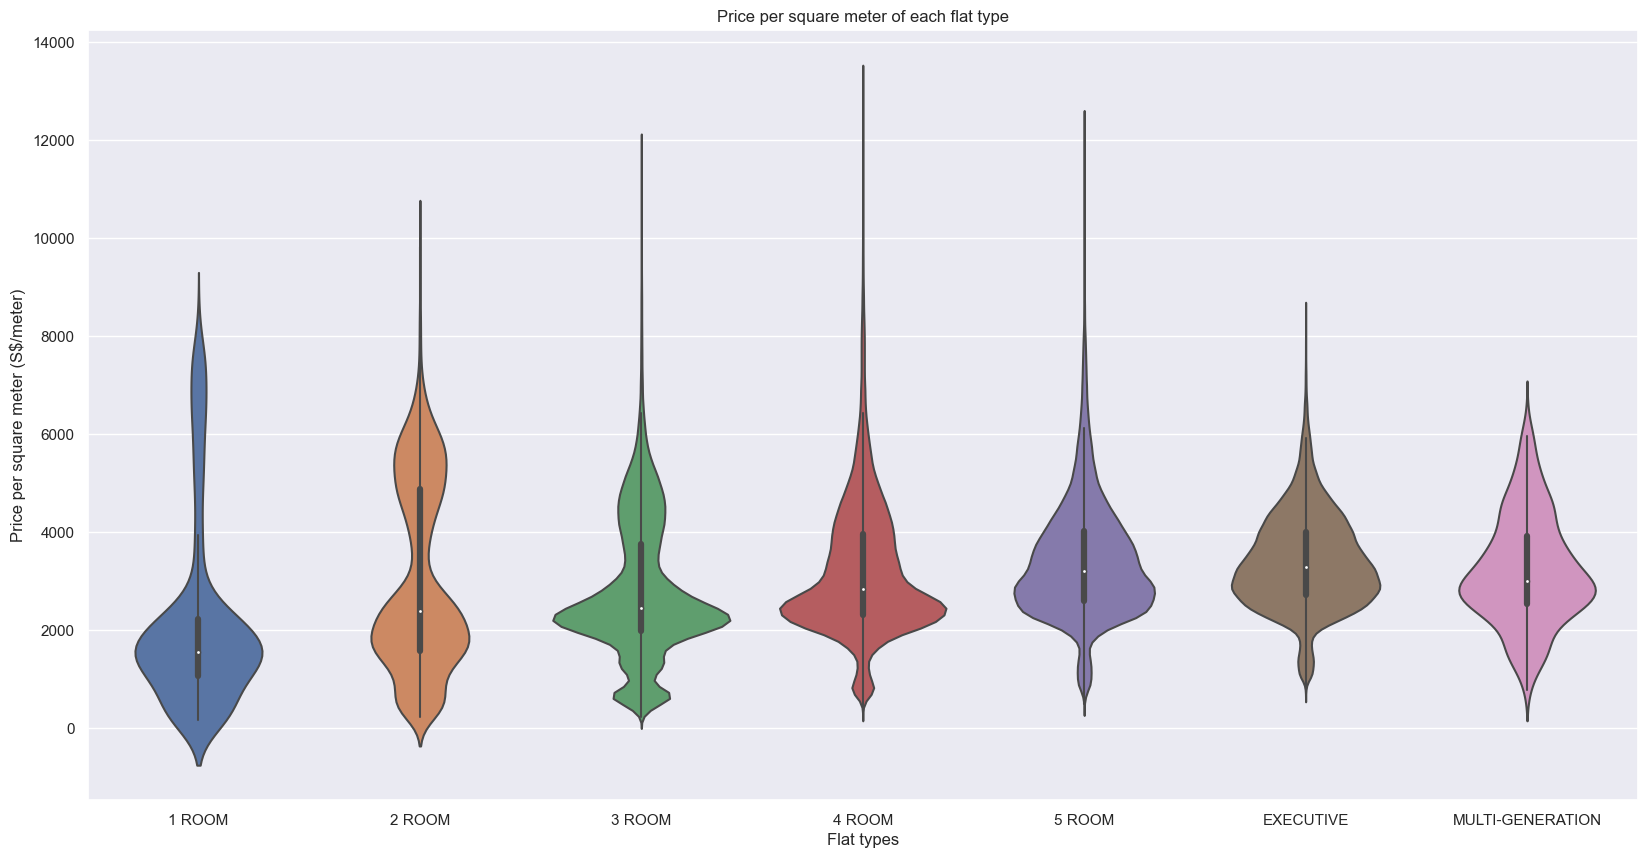

In [21]:
# Sort flat types for plotting
number_of_flat_type.sort()

fig_type, flat_type_price_per_sqm_ax = plt.subplots(figsize=(20,10))
sns.violinplot(data = filtered_hdb_resale_price_df, x = "flat_type", y = "price_per_sqm", order = number_of_flat_type, ax = flat_type_price_per_sqm_ax)
flat_type_price_per_sqm_ax.set(title="Price per square meter of each flat type",
                               xlabel = "Flat types", 
                               ylabel = "Price per square meter (S$/meter)")

In [22]:
# Finding out where the outliers lies by finding inter-quantile range(iqr)
flat_type_order = filtered_hdb_resale_price_df.groupby(by=["flat_type"])["price_per_sqm"]
iqr = flat_type_order.quantile(0.75) - flat_type_order.quantile(0.25) # Finding inter range by quantile 3 - quantile 1

#Finding the upper whisker
flat_type_outliers = flat_type_order.quantile(0.75) + (1.5 * iqr)
flat_type_outliers

flat_type
1 ROOM              3961.067853
2 ROOM              9838.676329
3 ROOM              6425.373134
4 ROOM              6428.571429
5 ROOM              6134.605896
EXECUTIVE           5928.174879
MULTI-GENERATION    6037.136350
Name: price_per_sqm, dtype: float64

In [23]:
# Adding column to catergories outliers and non-outliers that is above upper whisker
filtered_hdb_resale_price_df.reset_index(drop=True, inplace=True)
temp_list=[]

for flat_type, price in zip(filtered_hdb_resale_price_df["flat_type"],filtered_hdb_resale_price_df["price_per_sqm"]):
    for room in flat_type_outliers.index:
        if (flat_type == room) and (price > flat_type_outliers[room]): 
            temp_list.append("outlier")
        elif (flat_type == room) and (price < flat_type_outliers[room]): 
            temp_list.append("not outlier")
filtered_hdb_resale_price_df["outlier_not_outlier"] = temp_list

C:\Users\User\AppData\Local\Temp\ipykernel_19896\1039728788.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
filtered_hdb_resale_price_df[filtered_hdb_resale_price_df["outlier_not_outlier"]== "outlier"].describe()

floor_area_sqm  lease_commence_date  resale_price  remaining_lease  \
count    19265.000000         19265.000000  1.926500e+04     19265.000000   
mean        95.779393          2001.092915  7.031879e+05        82.348560   
std         22.158152            13.485160  1.550814e+05        12.872047   
min         31.000000          1967.000000  1.230000e+05        46.000000   
25%         85.000000          1993.000000  6.100000e+05        73.000000   
50%         93.000000          2005.000000  7.150000e+05        87.000000   
75%        112.000000          2012.000000  8.080000e+05        93.000000   
max        189.000000          2019.000000  1.400000e+06       100.000000   

               year  price_per_sqm  
count  19265.000000   19265.000000  
mean    2017.744355    7408.258978  
std        3.651772     998.445505  
min     1996.000000    3967.741935  
25%     2015.000000    6636.363636  
50%     2018.000000    7168.141593  
75%     2021.000000    7966.101695  
max     2022.000000   13310.344828

In [25]:
filtered_hdb_resale_price_df[filtered_hdb_resale_price_df["outlier_not_outlier"]== "not outlier"].describe()

floor_area_sqm  lease_commence_date  resale_price  remaining_lease  \
count   848236.000000        848236.000000  8.482360e+05    848236.000000   
mean        95.691744          1987.359467  2.950243e+05        81.478844   
std         26.017134             9.706053  1.432815e+05        10.211353   
min         28.000000          1966.000000  5.000000e+03        44.000000   
25%         73.000000          1980.000000  1.850000e+05        75.000000   
50%         93.000000          1986.000000  2.800000e+05        83.000000   
75%        114.000000          1995.000000  3.880000e+05        90.000000   
max        243.000000          2019.000000  1.100000e+06       101.000000   

                year  price_per_sqm  
count  848236.000000  848236.000000  
mean     2004.880623    3039.850060  
std         8.541240    1191.265439  
min      1990.000000     161.290323  
25%      1998.000000    2243.243243  
50%      2004.000000    2813.462450  
75%      2011.000000    3859.060403  
max      2022.000000    9818.181818

[Text(0.5, 1.0, 'Number of outliers over the years'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of transactions')]

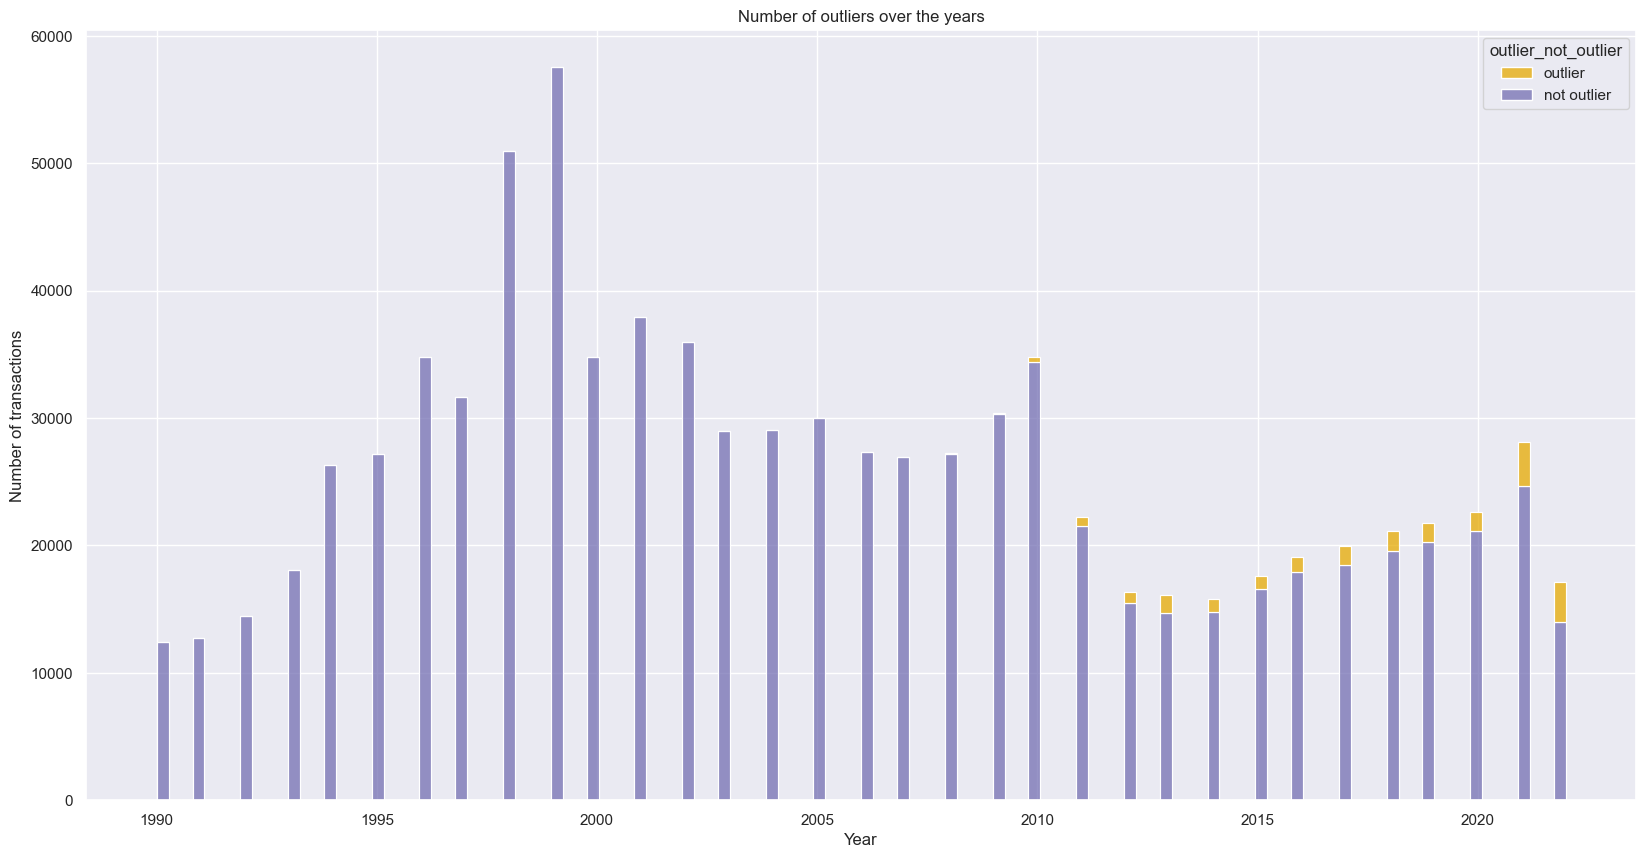

In [26]:
fig_outlier, outlier_ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=filtered_hdb_resale_price_df,
            x = "year",
            palette = "Dark2_r",
            multiple = "stack",
            hue = "outlier_not_outlier",
            hue_order = ["outlier","not outlier"],
            ax = outlier_ax)
outlier_ax.set(title="Number of outliers over the years",
               xlabel = "Year", 
               ylabel = "Number of transactions")

In [27]:
# Creating a column to allocate date ranges that is separated into 3 date periods
temp_list=[]
for year in filtered_hdb_resale_price_df["year"]:
    if year >= 2010:
        temp_list.append("from 2011 onwards")
    elif year >= 2001 and year < 2010:
        temp_list.append("from 1999 to 2006")
    elif year <= 2000:
        temp_list.append("from 1990 to 2008")

filtered_hdb_resale_price_df["year_range"]= temp_list

C:\Users\User\AppData\Local\Temp\ipykernel_19896\2120288037.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0.5, 1.0, 'Price per square meter of each flat type on different time period'),
 Text(0.5, 0, 'Flat types'),
 Text(0, 0.5, 'Price per square meter (S$/meter)')]

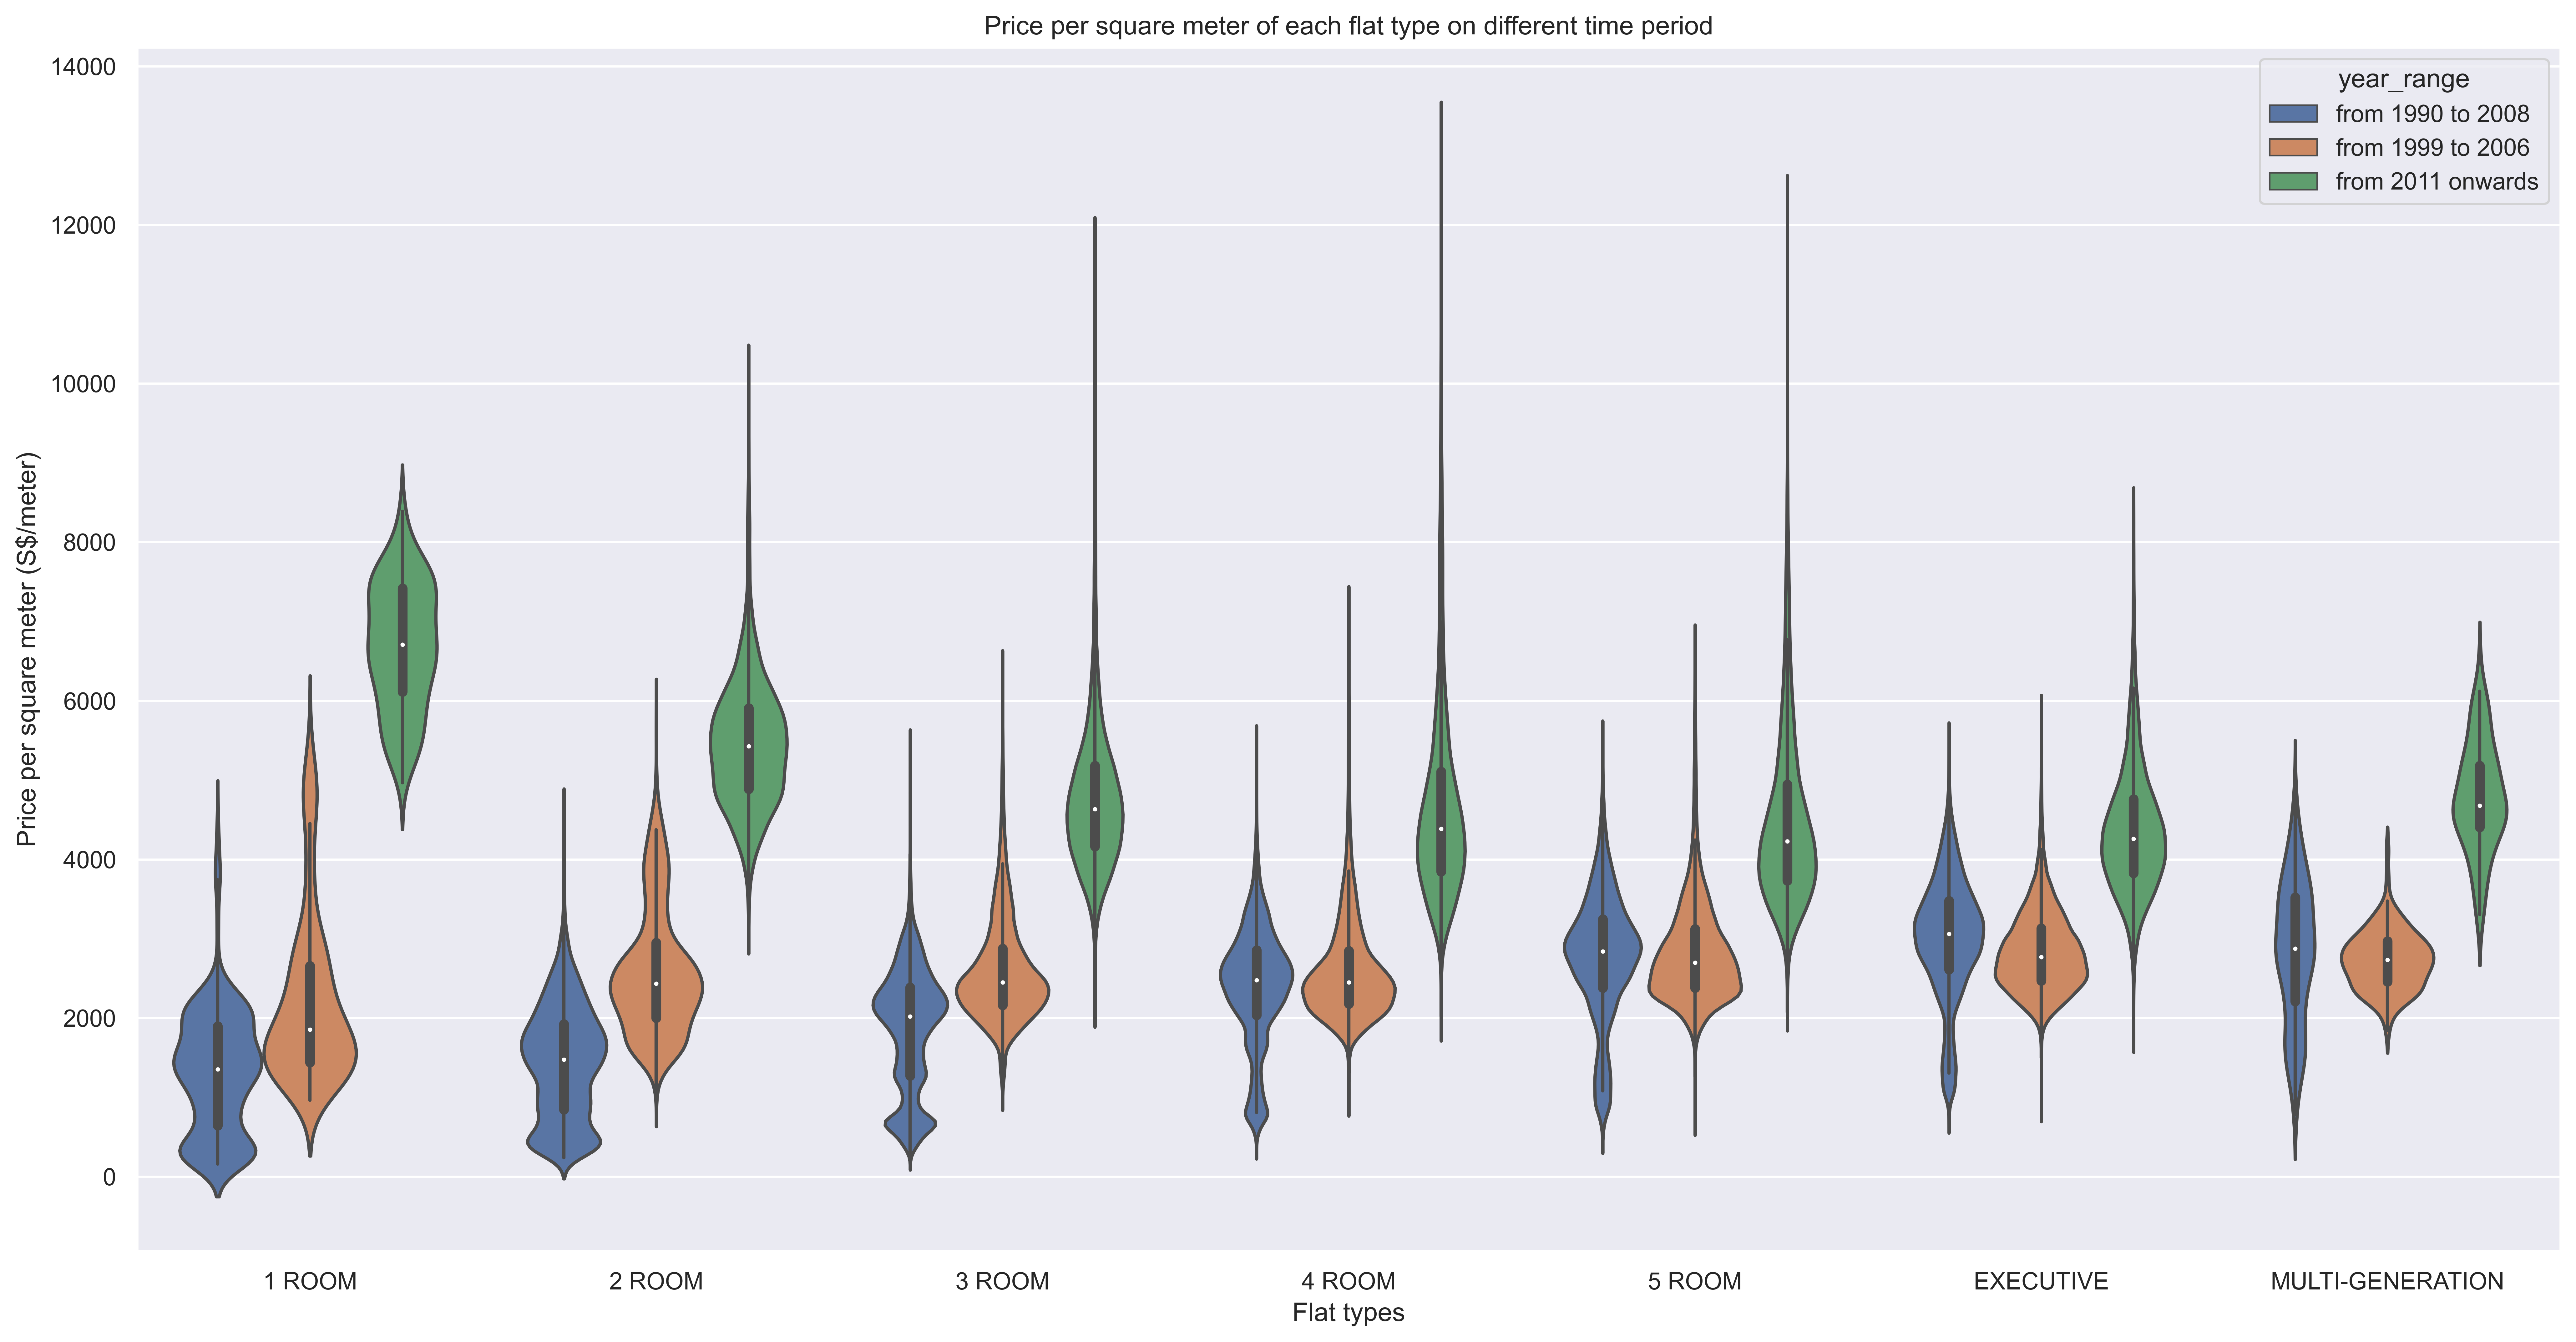

In [28]:
# Sort flat types for plotting
number_of_flat_type.sort()

# PLotting different years range for each room type
fig_type, flat_type_price_per_sqm_ax = plt.subplots(figsize=(20,10), dpi=500)
sns.violinplot(data = filtered_hdb_resale_price_df, x = "flat_type", y = "price_per_sqm", hue="year_range", order=number_of_flat_type, ax = flat_type_price_per_sqm_ax)
flat_type_price_per_sqm_ax.set(title="Price per square meter of each flat type on different time period",
                               xlabel = "Flat types", 
                               ylabel = "Price per square meter (S$/meter)")


## 2.3  Price per sqm to be compared within town

In [29]:
# Slicing out dataframe from year 2011 onwards
hdb_resale_price_2011_onwards = filtered_hdb_resale_price_df[filtered_hdb_resale_price_df["year_range"] == "from 2011 onwards"]
hdb_resale_price_2011_onwards.reset_index(inplace=True, drop=True)
hdb_resale_price_2011_onwards

date        town  flat_type block       street_name storey_range  \
0       2010-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     10 TO 12   
1       2010-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     01 TO 03   
2       2010-01  ANG MO KIO     2 ROOM   314  ANG MO KIO AVE 3     07 TO 09   
3       2010-01  ANG MO KIO     2 ROOM   323  ANG MO KIO AVE 3     01 TO 03   
4       2010-01  ANG MO KIO     2 ROOM   170  ANG MO KIO AVE 4     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
272736  2022-08      YISHUN     5 ROOM   850      YISHUN ST 81     01 TO 03   
272737  2022-08      YISHUN  EXECUTIVE   325       YISHUN CTRL     07 TO 09   
272738  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
272739  2022-08      YISHUN  EXECUTIVE   355    YISHUN RING RD     07 TO 09   
272740  2022-08      YISHUN  EXECUTIVE   643      YISHUN ST 61     10 TO 12   

        floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0                 44.0    Improved                 1977      202000.0   
1                 44.0    Improved                 1978      208000.0   
2                 44.0    Improved                 1978      180000.0   
3                 44.0    Improved                 1977      198000.0   
4                 45.0    Improved                 1986      181000.0   
...                ...         ...                  ...           ...   
272736           122.0    Improved                 1988      570000.0   
272737           146.0  Maisonette                 1988      768888.0   
272738           150.0  Maisonette                 1988      778000.0   
272739           146.0  Maisonette                 1988      838000.0   
272740           146.0  Maisonette                 1987      748000.0   

        remaining_lease  year  price_per_sqm outlier_not_outlier  \
0                    66  2010    4590.909091         not outlier   
1                    67  2010    4727.272727         not outlier   
2                    67  2010    4090.909091         not outlier   
3                    66  2010    4500.000000         not outlier   
4                    75  2010    4022.222222         not outlier   
...                 ...   ...            ...                 ...   
272736               65  2022    4672.131148         not outlier   
272737               65  2022    5266.356164         not outlier   
272738               65  2022    5186.666667         not outlier   
272739               65  2022    5739.726027         not outlier   
272740               64  2022    5123.287671         not outlier   

               year_range  
0       from 2011 onwards  
1       from 2011 onwards  
2       from 2011 onwards  
3       from 2011 onwards  
4       from 2011 onwards  
...                   ...  
272736  from 2011 onwards  
272737  from 2011 onwards  
272738  from 2011 onwards  
272739  from 2011 onwards  
272740  from 2011 onwards  

[272741 rows x 15 columns]

In [30]:
# Grouping by town
grouped_by_town = hdb_resale_price_2011_onwards.groupby(["town"])
town_average_price = grouped_by_town[["resale_price"]].mean()
town_average_price_per_sqm = grouped_by_town[["price_per_sqm"]].mean()

# Sorting the order of towns for plotting
town_average_price.sort_values(by="resale_price", inplace=True)
town_average_price_per_sqm.sort_values(by="price_per_sqm", inplace=True)

# Finding highest five towns resale price
town_average_price_highest_5 = town_average_price.nlargest(5, columns="resale_price")
town_average_price_per_sqm_highest_5 = town_average_price_per_sqm.nlargest(5, columns="price_per_sqm")

# Finding lowest five towns price square per meter
town_average_price_lowest_5 = town_average_price.nsmallest(5, columns="resale_price")
town_average_price_per_sqm_lowest_5 = town_average_price_per_sqm.nsmallest(5, columns="price_per_sqm")

print(f"Highest price town:\n{town_average_price_highest_5}\n {town_average_price_per_sqm_highest_5}\n")
print(f"Lowest price town:\n{town_average_price_lowest_5}\n {town_average_price_per_sqm_lowest_5}")


Highest price town:
                resale_price
town                        
BUKIT TIMAH    670602.263318
BISHAN         590808.784519
BUKIT MERAH    549019.840703
QUEENSTOWN     530524.533888
MARINE PARADE  527061.900150
                price_per_sqm
town                        
QUEENSTOWN       6525.003327
BUKIT MERAH      6308.508738
CENTRAL AREA     6296.352329
BUKIT TIMAH      6185.231627
MARINE PARADE    6045.835349

Lowest price town:
              resale_price
town                      
YISHUN       376500.573286
ANG MO KIO   402755.046110
BUKIT BATOK  402974.234066
WOODLANDS    403770.261355
JURONG WEST  409876.541188
                price_per_sqm
town                        
WOODLANDS        3788.715365
CHOA CHU KANG    3887.033903
SEMBAWANG        4020.481957
JURONG WEST      4042.468043
YISHUN           4113.951694


[Text(0, 0, 'WOODLANDS'),
 Text(1, 0, 'CHOA CHU KANG'),
 Text(2, 0, 'SEMBAWANG'),
 Text(3, 0, 'JURONG WEST'),
 Text(4, 0, 'YISHUN'),
 Text(5, 0, 'PASIR RIS'),
 Text(6, 0, 'BUKIT PANJANG'),
 Text(7, 0, 'BUKIT BATOK'),
 Text(8, 0, 'HOUGANG'),
 Text(9, 0, 'JURONG EAST'),
 Text(10, 0, 'TAMPINES'),
 Text(11, 0, 'SENGKANG'),
 Text(12, 0, 'BEDOK'),
 Text(13, 0, 'ANG MO KIO'),
 Text(14, 0, 'SERANGOON'),
 Text(15, 0, 'PUNGGOL'),
 Text(16, 0, 'GEYLANG'),
 Text(17, 0, 'TOA PAYOH'),
 Text(18, 0, 'CLEMENTI'),
 Text(19, 0, 'BISHAN'),
 Text(20, 0, 'KALLANG/WHAMPOA'),
 Text(21, 0, 'MARINE PARADE'),
 Text(22, 0, 'BUKIT TIMAH'),
 Text(23, 0, 'CENTRAL AREA'),
 Text(24, 0, 'BUKIT MERAH'),
 Text(25, 0, 'QUEENSTOWN')]

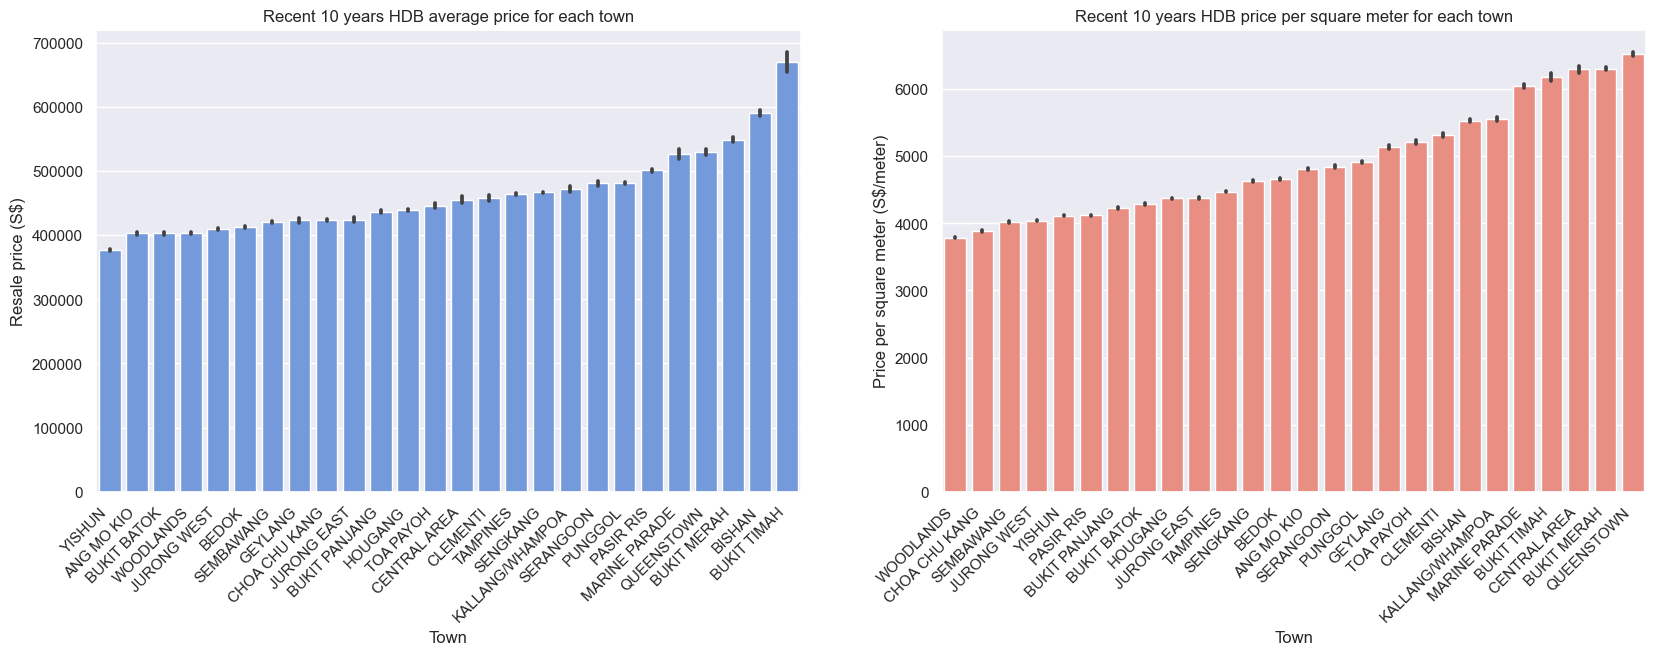

In [31]:
# Plotting bar chart for each town
fig, (resale_price_ax, price_per_sqm_ax) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.barplot(data = hdb_resale_price_2011_onwards,
            x = "town",
            y = "resale_price", 
            ax = resale_price_ax,
            order = town_average_price.index, 
            color="cornflowerblue")
resale_price_ax.set_xticklabels(town_average_price.index,rotation=45, ha="right")
resale_price_ax.set(title="Recent 10 years HDB average price for each town", xlabel = "Town", ylabel = "Resale price (S$)")

sns.barplot(data=hdb_resale_price_2011_onwards,
            x = "town", 
            y = "price_per_sqm", 
            ax = price_per_sqm_ax,
            order = town_average_price_per_sqm.index, 
            color = "salmon")
price_per_sqm_ax.set(title = "Recent 10 years HDB price per square meter for each town", xlabel = "Town", ylabel = "Price per square meter (S$/meter)")
price_per_sqm_ax.set_xticklabels(town_average_price_per_sqm.index, rotation = 45, ha = "right")


In [99]:
# Grouping and sorting average price per sqm for each town
top_5_towns_based_on_resale_price = hdb_resale_price_2011_onwards[hdb_resale_price_2011_onwards["town"].isin(town_average_price_highest_5.index)]
top_5_towns_based_on_price_per_sqm = hdb_resale_price_2011_onwards[hdb_resale_price_2011_onwards["town"].isin(town_average_price_per_sqm_highest_5.index)]
lowest_5_towns_based_on_resale_price = hdb_resale_price_2011_onwards[hdb_resale_price_2011_onwards["town"].isin(town_average_price_lowest_5.index)]
lowest_5_towns_based_on_price_per_sqm = hdb_resale_price_2011_onwards[hdb_resale_price_2011_onwards["town"].isin(town_average_price_per_sqm_lowest_5.index)]

fig_type, (town_base_on_price_ax, town_base_on_price_per_sqm_ax) = plt.subplots(nrows=2, ncols=1, figsize=(30,20), dpi=500)
sns.lineplot(data=top_5_towns_based_on_resale_price, x="year", y="resale_price", hue="town", ax=town_base_on_price_ax, err_style=None)
sns.lineplot(data=lowest_5_towns_based_on_resale_price, x="year", y="resale_price", style="town", hue="town",marker=True, dashes=True, ax=town_base_on_price_ax, err_style=None)
sns.lineplot(data=top_5_towns_based_on_price_per_sqm, x="year", y="price_per_sqm", hue="town", ax=town_base_on_price_per_sqm_ax, err_style=None)
sns.lineplot(data=lowest_5_towns_based_on_price_per_sqm, x="year", y="price_per_sqm", style="town", hue="town",marker=True, dashes=True, ax=town_base_on_price_per_sqm_ax, err_style=None)
town_base_on_price_ax.set(title="Average HDB resale price for top 5 and lowest 5 towns from 2010 to 2022", 
                          xlabel = "Year", 
                          ylabel = "Resale price (S$)")
town_base_on_price_ax.set_xlim([2010, 2022])
town_base_on_price_ax.set_ylim([300000, 800000])
fig.suptitle('Average HDB resale price for top 5 and lowest 5 towns from 2010 to 2022', fontsize=30)


town_base_on_price_ax.titlesize="large"

town_base_on_price_per_sqm_ax.set(title="Average HDB price per square meter for top 5 and lowest 5 towns from 2010 to 2022", 
                                  xlabel = "Year", 
                                  ylabel = "Price per square meter (S$/meter)")
town_base_on_price_per_sqm_ax.set_xlim([2010, 2022])
town_base_on_price_per_sqm_ax.set_ylim([3000, 8400])

(3000.0, 8400.0)

In [33]:
# Calculating average resale price and price per square meter increase from 2011 onwards by first grouping according to year then town
hdb_2011_onwards_groupby_year_town = hdb_resale_price_2011_onwards.groupby(["year","town"], as_index=False).mean()
town_price_2022 = hdb_2011_onwards_groupby_year_town.loc[hdb_2011_onwards_groupby_year_town["year"] == 2022]
town_price_2010 = hdb_2011_onwards_groupby_year_town.loc[hdb_2011_onwards_groupby_year_town["year"] == 2010]

# Extracting only year 2010 and 2022 data
town_price_2022.index = town_price_2022["town"]
town_price_2010.index = town_price_2010["town"]

# Minus 2022 price from 2011 price and find average increase per year for each town 
town_list = hdb_resale_price_2011_onwards["town"].unique()
temp_list=[]
for town in town_list:
    temp_list.append((town_price_2022.loc[town,'resale_price'] - town_price_2010.loc[town,'resale_price']) / 12)

# Add price increase column to 2010 data and calculate price increase percent
town_price_2010["price_increase_per_year"] = temp_list
town_price_2010["percent_increase"] = town_price_2010["price_increase_per_year"] / town_price_2010["resale_price"] * 100

C:\Users\User\AppData\Local\Temp\ipykernel_19896\2862298108.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_19896\2862298108.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\User\AppData\Local\Temp\ipykernel_19896\982499746.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_19896\982499746.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0.5, 1.0, 'Percentage increase per year for each town'),
 Text(0.5, 0, 'Town'),
 Text(0, 0.5, 'Percentage increased (%)')]

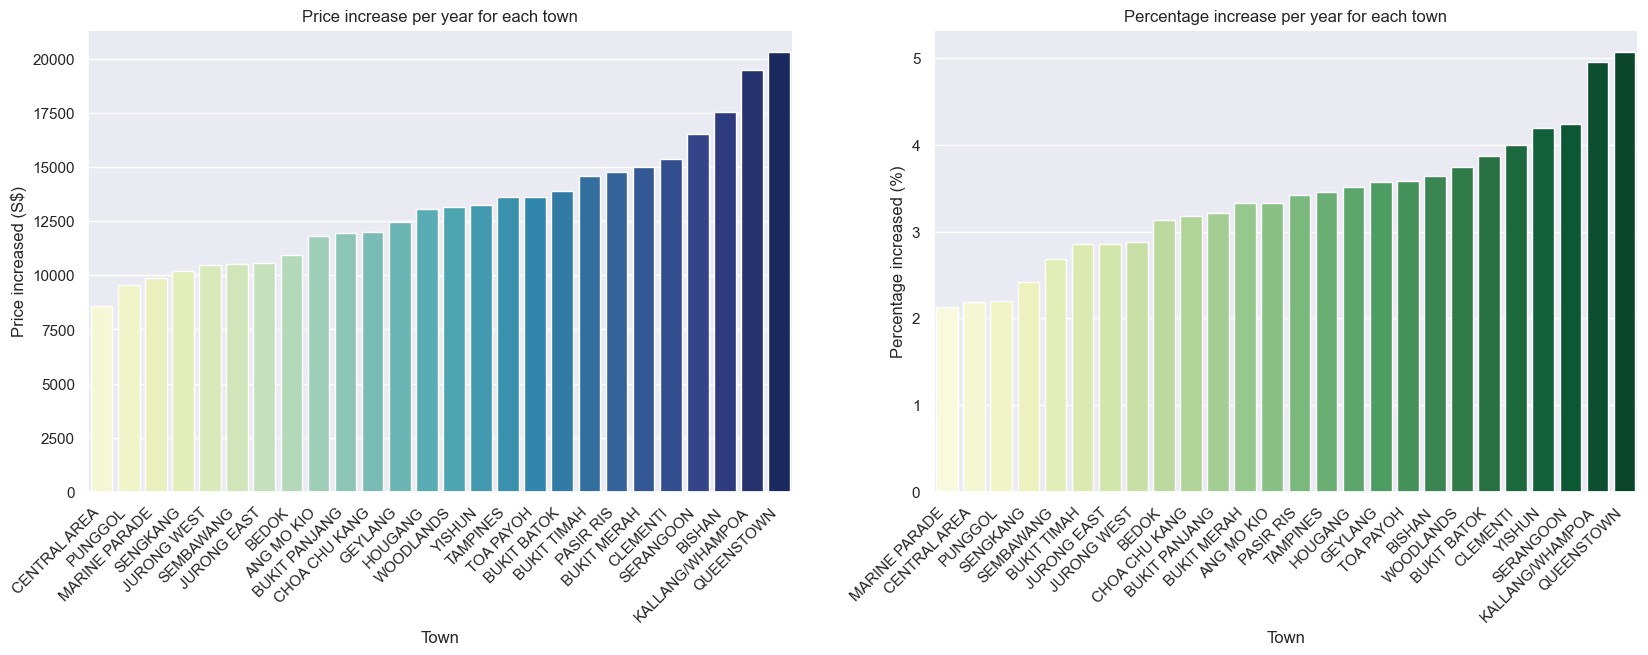

In [79]:
# Sorting by price increase per year to plot the increase for each town
town_price_2010.sort_values(by="price_increase_per_year", inplace=True)

fig, (price_increase_ax, percentage_incease_ax) = plt.subplots(nrows=1 , ncols=2, figsize=(20,6))
sns.barplot(data=town_price_2010,
            x = "town",
            y = "price_increase_per_year", 
            ax = price_increase_ax,
            palette = "YlGnBu")
price_increase_ax.set_xticklabels(town_price_2010.town, rotation=45, ha="right")
price_increase_ax.set(title="Price increase per year for each town", xlabel = "Town", ylabel = "Price increased (S$)")

# Sorting by percentage increase per year to plot the increase for each town
town_price_2010.sort_values(by="percent_increase", inplace=True)

# Plotting of increase percentage for each town
sns.barplot(data=town_price_2010,
            x = "town",
            y = "percent_increase", 
            ax = percentage_incease_ax,
            palette = "YlGn")
percentage_incease_ax.set_xticklabels(town_price_2010.town, rotation=45, ha="right")
percentage_incease_ax.set(title="Percentage increase per year for each town", xlabel = "Town", ylabel = "Percentage increased (%)")

In [100]:
# Showing output of decreasing increased price per year
town_price_2010.sort_values(by="price_increase_per_year",ascending=False)[["price_increase_per_year","percent_increase"]].round(2)

price_increase_per_year  percent_increase
town                                                      
QUEENSTOWN                      20328.71              5.07
KALLANG/WHAMPOA                 19464.06              4.96
BISHAN                          17530.56              3.64
SERANGOON                       16543.01              4.24
CLEMENTI                        15386.72              4.00
BUKIT MERAH                     15012.42              3.33
PASIR RIS                       14794.43              3.42
BUKIT TIMAH                     14601.84              2.86
BUKIT BATOK                     13916.23              3.88
TOA PAYOH                       13626.91              3.59
TAMPINES                        13601.23              3.46
YISHUN                          13260.26              4.19
WOODLANDS                       13157.45              3.75
HOUGANG                         13085.28              3.51
GEYLANG                         12462.69              3.57
CHOA CHU KANG                   12007.23              3.18
BUKIT PANJANG                   11948.78              3.21
ANG MO KIO                      11808.56              3.33
BEDOK                           10926.27              3.13
JURONG EAST                     10582.60              2.86
SEMBAWANG                       10514.25              2.68
JURONG WEST                     10461.11              2.88
SENGKANG                        10177.44              2.42
MARINE PARADE                    9887.17              2.13
PUNGGOL                          9541.43              2.19
CENTRAL AREA                     8591.00              2.19

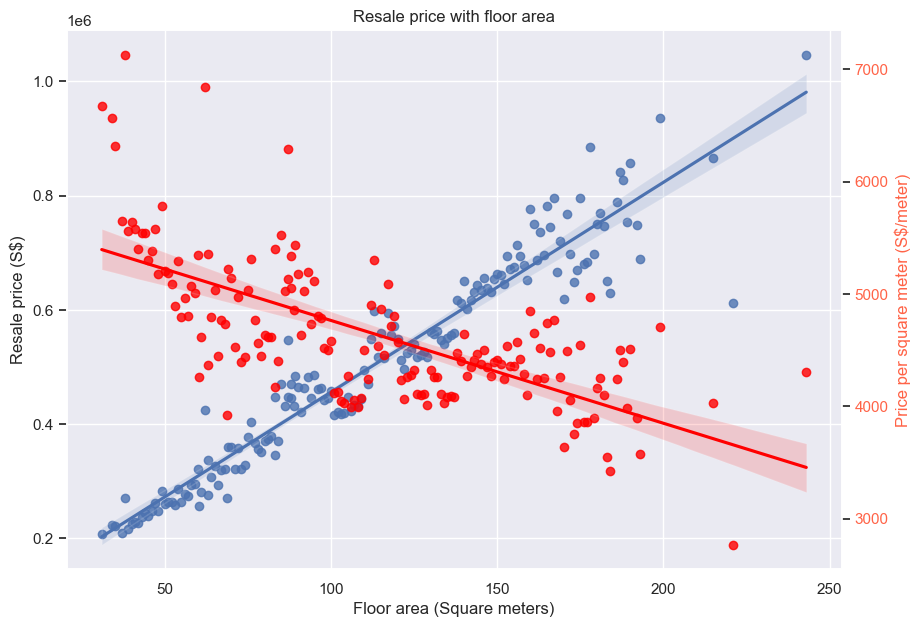

In [97]:
# Grouping by floor_area_sqm and average
group_by_floor_area = hdb_resale_price_2011_onwards.groupby(["floor_area_sqm"])
group_by_floor_area_price_average = group_by_floor_area[["resale_price"]].mean()
group_by_floor_area_price_per_sqm_average = group_by_floor_area[["price_per_sqm"]].mean()
group_by_floor_area_price_average.reset_index(inplace=True)
group_by_floor_area_price_per_sqm_average.reset_index(inplace=True)

# Plotting resale price against floor area
fig, resale_area_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
sns.regplot(data=group_by_floor_area_price_average, x="floor_area_sqm", y="resale_price", ax=resale_area_ax)
resale_area_ax.set(title="Resale price with floor area", xlabel = "Floor area (Square meters)", ylabel = "Resale price (S$)")

# Plotting price per square meter against floor area
price_per_sqm_area_ax = resale_area_ax.twinx()
sns.regplot(data=group_by_floor_area_price_per_sqm_average, x="floor_area_sqm", y="price_per_sqm", color="red", ax=price_per_sqm_area_ax)
price_per_sqm_area_ax.set_ylabel("Price per square meter (S$/meter)", color="tomato")
price_per_sqm_area_ax.grid(False) # Remove gridlines for second chart
for label in price_per_sqm_area_ax.get_yticklabels():# Set all label for this axes to different colors from the other axes
    label.set_color("tomato")


<AxesSubplot:>

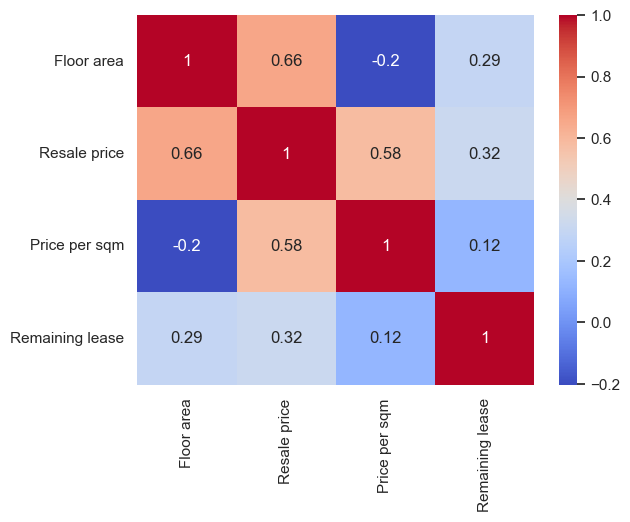

In [89]:
# Calculating correlation for floor area and resale price
sns.heatmap(hdb_resale_price_2011_onwards.loc[:,["floor_area_sqm","resale_price","price_per_sqm","remaining_lease"]].corr(), annot=True,
                                              xticklabels = ["Floor area", "Resale price", "Price per sqm", "Remaining lease"], 
                                              yticklabels = ["Floor area", "Resale price", "Price per sqm", "Remaining lease"], 
                                              cmap = "coolwarm")

## 2.4  How does remaning lease affect resale price

(4000.0, 5750.0)

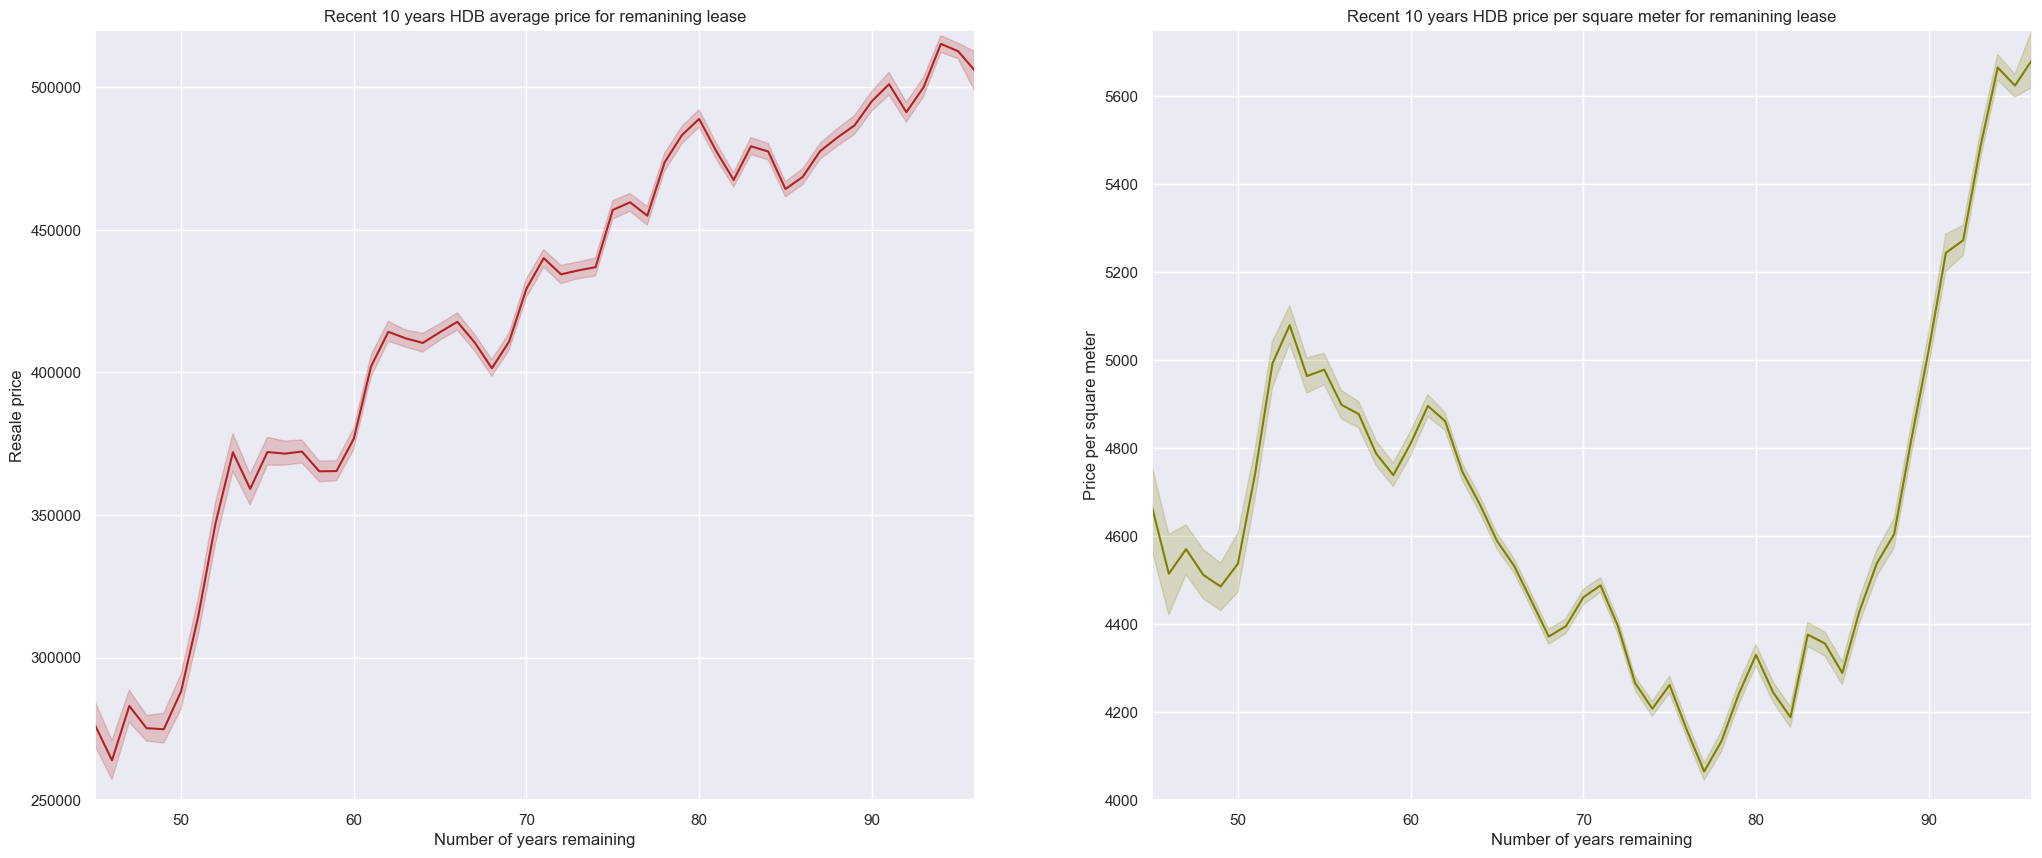

In [93]:
# Plotting bar chart for each town
fig, (resale_price_ax, price_per_sqm_ax) = plt.subplots(nrows=1, ncols=2, figsize=(25,10))
sns.lineplot(data = hdb_resale_price_2011_onwards, x = "remaining_lease", y = "resale_price", ax = resale_price_ax, color="firebrick")
resale_price_ax.set(title="Recent 10 years HDB average price for remanining lease", xlabel = "Number of years remaining", ylabel = "Resale price")
resale_price_ax.set_xlim([45,96])
resale_price_ax.set_ylim([250000,520000])

sns.lineplot(data = hdb_resale_price_2011_onwards, x = "remaining_lease", y = "price_per_sqm", ax = price_per_sqm_ax, color = "olive")
price_per_sqm_ax.set(title = "Recent 10 years HDB price per square meter for remanining lease", xlabel = "Number of years remaining", ylabel = "Price per square meter")
price_per_sqm_ax.set_xlim([45,96])
price_per_sqm_ax.set_ylim([4000,5750])